# EDA on Google Play Store Apps Data

# Metadata

The metadata description for Google Play Store apps data includes the following fields:

1. **App**: The name of the application.
2. **Category**: The category to which the app belongs (e.g., Games, Social, Productivity).
3. **Rating**: The average user rating of the app.
4. **Reviews**: The total number of user reviews for the app.
5. **Size**: The size of the app installation package.
6. **Installs**: The number of times the app has been installed.
7. **Type**: Indicates whether the app is free or paid.
8. **Price**: The cost of the app if it is not free.
9. **Content Rating**: The target audience for the app based on content (e.g., Everyone, Teen, Mature).
10. **Genres**: Additional categorization of the app based on its features or content.
11. **Last Updated**: The date of the last update to the app.
12. **Current Ver**: The current version of the app.
13. **Android Ver**: The minimum Android version required to run the app.



# Data loading and Exploration

**Importing Necessary Libraries and Importing data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats

df=pd.read_csv('googleplaystore.csv')


**Printing the head of the data**

In [2]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [3]:
df.shape   #cheking no. of rows & columns

(10840, 13)

In [4]:
#Extracting imformation about the data
def info():
    df1 = pd.DataFrame(index = df.columns)
    df1['Data_Type'] = df.dtypes
    df1['Unique_Val_Count'] = df.nunique()
    df1['Null_val_Count'] = df.isnull().sum()
    return df1
info()

,Data_Type,Unique_Val_Count,Null_val_Count
App,object,9659,0
Category,object,33,0
Rating,float64,39,1474
Reviews,int64,6001,0
Size,object,461,0
Installs,object,21,0
Type,object,2,1
Price,object,92,0
Content Rating,object,6,0
Genres,object,119,0


As of now there are only two numerical columns [ "Rating & Reviews"]

In [5]:
#Checkimg for duplicate Values
df.duplicated().sum()

483

In [6]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [7]:
df.groupby('Type')['Size'].mean()

TypeError: Could not convert 19M14M8.7M25M2.8M5.6M19M29M33M3.1M28M12M20M21M37M2.7M5.5M17M39M31M14M12M4.2M7.0M23M6.0M25M6.1M4.6M4.2M9.2M5.2M11M11M4.2M9.2M24MVaries with device11M9.4M15M10MVaries with device1.2M12M24M26M8.0M7.9M25M56M57MVaries with device35M33M33M5.6M54M201k3.6M5.7M17M8.6M2.4M27M2.7M2.5MVaries with deviceVaries with device7.0M35M16M16MVaries with device17M3.4M8.9M3.9M2.9M38M32M37M15M5.4M18MVaries with device38M1.1MVaries with deviceVaries with device7.9M35MVaries with device17M19M14M2.2M4.5M17M14M9.8M21MVaries with device52M14M25M9.0MVaries with device12MVaries with device35M6.7M30M5.7M2.9M17M2.9MVaries with deviceVaries with device2.6M4.2M7.1M57M3.7M22M24M7.4M21M3.4M2.9M3.1M6.4M3.2M8.2M9.9M2.9M23M4.6M3.1MVaries with device4.9M9.5MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device4.2M5.4MVaries with device2.8M5.0MVaries with device5.9M13M7.1M6.7MVaries with device17M19M6.7M21MVaries with device2.7M37M15M23M19M23M73M4.9M6.8MVaries with deviceVaries with device2.9M3.5M4.0M21M2.3MVaries with device7.2M10M6.1M2.1M42M7.3M30MVaries with deviceVaries with deviceVaries with device29MVaries with deviceVaries with deviceVaries with device35M9.1M25M3.9M18M12M21MVaries with deviceVaries with deviceVaries with deviceVaries with device55M3.2MVaries with deviceVaries with device23k16MVaries with device14M37MVaries with deviceVaries with device11M25M7.3M6.5M25M3.1MVaries with device1.5M7.5M8.6MVaries with device1.2MVaries with deviceVaries with deviceVaries with device39M14M19MVaries with device14M20MVaries with deviceVaries with device26M51M41M20MVaries with device12M48M10M22M11M8.5M8.6MVaries with device28M28M37M9.0M46MVaries with device14MVaries with device26M23MVaries with deviceVaries with device14M20MVaries with deviceVaries with device26M51M41M20MVaries with device12M48M10M22M11M8.5M8.6MVaries with device28MVaries with deviceVaries with deviceVaries with device39M14M19MVaries with device35MVaries with device29M41MVaries with device4.9M27M32M12M15M11M28M2.2M3.4M8.3M4.3M4.7M10M15M7.1M21M6.1MVaries with device15M11M29M3.3MVaries with device22M40M10M9.1M4.7M38MVaries with device6.7M37MVaries with device7.8M19M5.7M35MVaries with deviceVaries with device17MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device8.8MVaries with device16M11M11MVaries with device15M6.6MVaries with device6.6MVaries with deviceVaries with device5.1MVaries with device18M4.0MVaries with deviceVaries with deviceVaries with device37MVaries with device22MVaries with device3.3M32M37MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device17MVaries with deviceVaries with device35M40M61M66MVaries with deviceVaries with device11M79kVaries with deviceVaries with device25M14MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device24MVaries with device17M8.3MVaries with device8.2MVaries with deviceVaries with deviceVaries with deviceVaries with device8.4MVaries with deviceVaries with device4.0M32MVaries with deviceVaries with deviceVaries with device6.1MVaries with deviceVaries with device2.8MVaries with deviceVaries with device3.3M40M2.2MVaries with device4.3M4.7M2.3M2.3M11M2.7M14MVaries with device13M3.7M10M13M10M13M8.8M5.5M20M29MVaries with deviceVaries with device11MVaries with device17M17MVaries with deviceVaries with device118kVaries with device16M5.1MVaries with device44M7.3M30M695kVaries with device1.6M19MVaries with deviceVaries with deviceVaries with device11MVaries with deviceVaries with deviceVaries with deviceVaries with device23M26MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device15MVaries with device56M12M11M29MVaries with device40MVaries with device53M3.1M24M23M5.0M44M27M6.1MVaries with device21M11M21M24M31M27M6.2MVaries with device12M8.0M5.9M7.9M5.0M1.4M13M40M13M19M5.0M19M27M3.0M13M7.2M25MVaries with device5.7M5.5MVaries with device6.5M5.8MVaries with device3.8M41M7.9M2.8M20M15M28M9.6M13M15M40M56M12M9.4M29M11M19M23MVaries with device27MVaries with device19M45M21M40M25M15M24MVaries with device11M38M31M6.1M27M32M13M63M44M16M28MVaries with device5.9M13M9.0M20M7.9M28M49M27M18M14M27M41M38M5.5M27M7.2M21M8.8M38MVaries with device11M6.5M26M19M6.1M77M9.5M14M38M16M3.4M4.7M5.0M4.9M4.9M16M3.9M4.4M4.8M4.5M70M4.9M3.7M4.9M16M4.6M3.6M21M13M8.7M9.2M6.9M39M8.0M3.9M14M11M13M9.3M5.0M10.0M5.0M5.0M3.6M19M5.0M9.8M14M5.0M4.9M5.5M11M3.8M5.0M8.2M21M12M10M3.3M25M15M10M4.9M4.4M3.5M7.8M9.0M15M19M56M38M16M5.0M27M4.7MVaries with device3.4M4.9M25M29M8.1M14M27M3.9M13M5.0M5.5M16M4.8M14M4.7M3.7M4.9M3.5M4.5MVaries with device36M4.5M19M14M77M21M7.9M9.3MVaries with device18M18M21M3.3M24M39M3.2M5.1M11M27M37MVaries with device26M11MVaries with device41M49M21M8.1M51M14M18M3.0M19MVaries with device22M6.9M7.4M84M25M18MVaries with device2.5M3.9MVaries with device21M27MVaries with device21M18MVaries with device18MVaries with device10MVaries with deviceVaries with deviceVaries with deviceVaries with device97M17MVaries with deviceVaries with device2.0M1.9M1.8M1.8M17M18M5.3MVaries with device5.4M5.4M5.4M15M5.3M48M5.4M47M556k29M2.3MVaries with device4.4M6.6MVaries with device526k12MVaries with device29MVaries with deviceVaries with deviceVaries with device21M18MVaries with deviceVaries with deviceVaries with device18M17M10M76MVaries with device17MVaries with deviceVaries with device18M21MVaries with device6.9MVaries with device14M76M11M19M6.5M7.0MVaries with device3.3M21MVaries with device2.6M21M5.2M18MVaries with device16M15M1.2MVaries with deviceVaries with device18M1.8M7.6MVaries with deviceVaries with device59MVaries with device6.9M14M41M19M76MVaries with device21M21M21MVaries with device21MVaries with deviceVaries with device5.4M7.3MVaries with device59M41MVaries with device21M76M7.6MVaries with device13MVaries with device4.5MVaries with device11MVaries with device4.6MVaries with deviceVaries with device3.3M6.5MVaries with deviceVaries with deviceVaries with device12MVaries with device5.6M9.7M15MVaries with device52MVaries with deviceVaries with device4.5MVaries with device49M18M13M4.0M16M17MVaries with device24MVaries with device12MVaries with device78MVaries with device25M57MVaries with device9.1M39MVaries with device16MVaries with device8.5M12M72M12MVaries with deviceVaries with device16M9.6MVaries with device22MVaries with device13MVaries with device12MVaries with device23M20M25M17MVaries with device19M21M19MVaries with deviceVaries with deviceVaries with deviceVaries with device19M4.4M19M12MVaries with device11MVaries with deviceVaries with deviceVaries with device12M25MVaries with deviceVaries with device21M13M17M20MVaries with device20M19M17M21M15M19M19M7.2M32MVaries with deviceVaries with device44M19MVaries with device11MVaries with deviceVaries with deviceVaries with device25MVaries with deviceVaries with deviceVaries with deviceVaries with device16MVaries with device20MVaries with device21M30MVaries with deviceVaries with device57M19M17MVaries with device15M19M19M19M44M19M35M44MVaries with deviceVaries with device20M19M25MVaries with device43MVaries with device3.6M7.7M44M12M77MVaries with device9.5M36M6.3M5.9MVaries with device12M2.8M26M8.7M16M53MVaries with device14M8.9M11M334k24M13MVaries with device2.8M9.7M1.4MVaries with device3.5M61M6.0M2.3M9.0M11M27M3.6MVaries with device29M4.4M21M13M27M11M24M6.1M6.3M23M34M3.8MVaries with deviceVaries with device42MVaries with device19M70M32M93MVaries with deviceVaries with deviceVaries with device40M24MVaries with device20M15M28M10MVaries with deviceVaries with deviceVaries with device14MVaries with device42M65M37MVaries with device39M47M79M18MVaries with device100M32M46MVaries with device9.8M8.2M18MVaries with device39M44MVaries with device5.0M21M22M23MVaries with deviceVaries with deviceVaries with device27MVaries with device5.0M32M7.4M24M22MVaries with device10M17M38M46M3.8M9.3M8.4M28MVaries with device9.7M11MVaries with device7.4M19M16M14M22M25M3.6MVaries with deviceVaries with device4.5MVaries with device23MVaries with deviceVaries with deviceVaries with device4.2MVaries with device58MVaries with device22MVaries with device1.4MVaries with device9.1M22MVaries with deviceVaries with deviceVaries with deviceVaries with device21MVaries with deviceVaries with device11M38M12M45M50M24M47M23M46M45M50M24M33MVaries with device12M53M14M68M37M79M32M46M40M32MVaries with device24M42M12M13M13M4.9M8.9MVaries with device19MVaries with device14M64M8.4M11M66MVaries with device41M15M35M36M17M25M35M10MVaries with device12MVaries with device11MVaries with deviceVaries with device17M43M41MVaries with device43M16M39M13M30M7.1M23M17M18MVaries with device17MVaries with device15M22MVaries with device9.0M7.2MVaries with device27MVaries with device8.2M76M22MVaries with device19MVaries with deviceVaries with device28M35MVaries with device22MVaries with deviceVaries with deviceVaries with device25M30M8.5MVaries with device17M34M34MVaries with device17M16MVaries with device15M2.2M11M6.9M13M11M2.9M25M7.0M27M7.5MVaries with device15M9.4M6.4M5.5M3.9M55M28MVaries with device8.8MVaries with device4.0M6.9M11MVaries with device5.5MVaries with device15M4.3MVaries with device7.1M58MVaries with deviceVaries with device18MVaries with device1.5M6.5M11M67MVaries with device57M59M48M57M13MVaries with deviceVaries with deviceVaries with device31M10M57MVaries with device21M25M93M60M27M54MVaries with deviceVaries with device59MVaries with device78M55MVaries with deviceVaries with device67MVaries with device35M43M39M4.2M44M45MVaries with device28M12M15M31MVaries with deviceVaries with deviceVaries with device20M39M94M35MVaries with device41M49M22MVaries with device23M28M7.2M6.5MVaries with device24MVaries with deviceVaries with device20MVaries with device15MVaries with device55MVaries with device38M32MVaries with deviceVaries with device40M59MVaries with deviceVaries with deviceVaries with device23M6.1MVaries with device58M55MVaries with deviceVaries with device57M93M60MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device19M3.8M18M57M5.5MVaries with device5.7M51M9.4M3.3MVaries with device4.0MVaries with deviceVaries with device19M3.8M4.3M18M5.7MVaries with device3.6M5.5M57M51M58MVaries with device9.4M3.3M4.0MVaries with deviceVaries with device9.9M43M37MVaries with deviceVaries with device40M73M28MVaries with device23M10M15M8.4M31MVaries with deviceVaries with deviceVaries with device41MVaries with deviceVaries with device20M39M35M34M7.5MVaries with device12M7.7M21M18M40MVaries with device8.7MVaries with device8.6MVaries with device18M7.5M9.1M13MVaries with device15MVaries with device19MVaries with deviceVaries with device5.1M26M8.3M27M7.9MVaries with device27M5.1M15M3.1M16M9.2MVaries with deviceVaries with device10M2.6M13M1.9M7.0M15M4.2M7.8M77M5.7M5.9M7.6M5.8MVaries with device5.8M5.3M5.5M25M35M7.9M19M7.5M12MVaries with device34M30MVaries with deviceVaries with device16MVaries with device16MVaries with device15M21M1.8M4.3M10M3.7M232k99M624k6.9M7.0M7.0M6.4MVaries with device16M5.9M95M8.5k20M2.5M50M10M18M12M2.5M2.1M22M41k22M292k5.5MVaries with device2.5M8.1M28M24M3.1M3.4M11k13M19M9.5M21M9.4M2.4M36M55M32M34M5.1M100M80M3.3M28M5.0M11M55M7.1M3.2M4.4M16M6.3M45M23M37M13M8.1M13M14M30M36M3.0M1.4M39M1.8M1.7M19M15M10.0M2.7M16M21M20M14M76M18M12M6.2MVaries with device6.8MVaries with device24M19M13M15M13MVaries with deviceVaries with device44MVaries with device9.7M24M13M4.5M4.5M29M12M12MVaries with device4.6M10M6.8M33M12MVaries with device4.6M10M6.8M33M13M15M23M7.7MVaries with device15M25MVaries with device3.0M22MVaries with deviceVaries with device7.5M24MVaries with device44MVaries with deviceVaries with device14M67M76M74M23M46M24MVaries with device97M62M24M33M7.8M46M69M75M67M50M98MVaries with device4.9M37M18M52MVaries with device78M3.9M59M97M11M38MVaries with deviceVaries with deviceVaries with deviceVaries with device85M78M63MVaries with device24M69M75MVaries with device70M63M99M49MVaries with device76M67M24M52M98M74M69M82MVaries with device96M99M46MVaries with device99M87M3.9M67MVaries with device53M7.8MVaries with device97MVaries with deviceVaries with device59MVaries with device46M75M50M62MVaries with device23M72M70M18MVaries with device35M78M25M74M97M17M53MVaries with device11M60M57M14M67M33M76M74MVaries with device40M59M52MVaries with deviceVaries with device100M62MVaries with deviceVaries with deviceVaries with deviceVaries with device85M87M33M32M40M29M40M24M38M52MVaries with device54M71M73M57M38M62M95M16M39M78M36MVaries with device31MVaries with device98M24M85M33M100M36M86M80M87M79M30M87M91M63MVaries with deviceVaries with device95M48MVaries with deviceVaries with device93M53M82M99M49M25MVaries with device91M52M56M56M85M81M82M98M77M99MVaries with device96M96M82M70M48M67M74M57M52M25MVaries with device36M31M91MVaries with device92M70M93M52M91M37M64M35M97M93M28M83M99M55M82M14M81MVaries with device74M67M52M76M67M50M46MVaries with deviceVaries with device97M98M70M69M3.9M7.8M18M24M62M11MVaries with device87M99MVaries with device82M94MVaries with deviceVaries with deviceVaries with device96M75MVaries with device14M59M74M29M17M97M78MVaries with deviceVaries with device63MVaries with device25M29M72MVaries with device53MVaries with device76M33M60M62MVaries with deviceVaries with device78M75MVaries with device70M99M99MVaries with device27M70M88M63M82M48MVaries with device31M23MVaries with device59M39M54M48MVaries with device30M66M32M50M53M61M49M38M20MVaries with deviceVaries with device66M57M95MVaries with deviceVaries with device32M33M66M75M29M74M69M7.8M33M52M50M46M12M41M63M53M63M99MVaries with device20M11M75M13M46M78M49M14M100MVaries with device97MVaries with deviceVaries with device15M33MVaries with device70M10M77MVaries with deviceVaries with device4.9MVaries with device25M96M23M51M96MVaries with deviceVaries with deviceVaries with device70M38M24MVaries with device20M67M19M51M22M46M21M39M23M26M39M24M15M20M24M44M38M52M14M49M8.9MVaries with device56M99M10M6.9M20M10M19M33M85M48M9.6MVaries with device15MVaries with device50M51M24M13M16MVaries with deviceVaries with device63M15M26M81MVaries with device94M46M43M45M91M91M53M28M26M56M80M60MVaries with device67M78M27MVaries with device63M26M46M83M67M99MVaries with device24M78MVaries with deviceVaries with device51M94M16M93M77M32M58M48M69M73M99M16M54M56M68M25M7.0M54M51MVaries with device48M44M8.7M91M97M26M16MVaries with device53M95M83M78M56M21M26M60M22M95M48M58M91M22M36M37M70M34M49M9.8M37MVaries with device55M84M16M92M57M16M17M18M16M19M1.6M47M16M14MVaries with device75M25M5.7M17M19M23M25M83M94M97M37M92M48M19M23M25M83M94M97M37M92M48M67MVaries with deviceVaries with deviceVaries with device63M49M14M58M22M15MVaries with device50M59M34MVaries with device54M53MVaries with deviceVaries with device37M25M26M61M58M91M17M83M17MVaries with device64M41M58M23M71MVaries with device11MVaries with device37MVaries with device9.8M23M18M7.4M11MVaries with device23M34M15M13M24M20M14M69M38M26M2.6M21M38M16M21M10M22M14M36M16M61M11M8.5M37MVaries with deviceVaries with device22M17M7.7M39M30M3.7M28M16M20M8.9M97M12M72MVaries with device21MVaries with device27M5.7M6.6M12M5.9M20M15M26M3.3M44M36M17M5.8M11M16M6.1MVaries with device22M28M6.3M60M8.0M20M6.4M34M70M21M38MVaries with device74M12M13M6.8M12M5.8M42M13M1.5M3.2M7.7M26M11MVaries with device2.9M22M16M19M40M23M15M29M16M65M29M20M3.8M19M25M5.1M16M1.5M10.0M22M3.6M20M20M13M2.5M3.6M24M10M25M29M17M53M83M4.6M4.6M28M29M46M5.7M1.4M12M2.2M27M18M30M3.5M4.2M6.9M6.6M7.0M11M5.6M29M3.3M20M7.0M3.3M29M7.1MVaries with device23M24M14M13M34M4.3M43M69M22M20M25M2.0M40M37M40M4.3M5.7M4.0M17M11M4.4M15M2.3M40M8.4M11M2.9M2.4M15M24M29M24M22M86MVaries with device22M11M975k980k6.0M20M26M13M23M2.7M4.2M28M6.1M15M1.2M37M5.9M14M2.3M32M2.7M2.2M26MVaries with deviceVaries with deviceVaries with device4.0MVaries with device1.5MVaries with device3.7MVaries with deviceVaries with deviceVaries with device2.8M3.9M3.1MVaries with device2.8M20M9.9M5.3M10M2.6MVaries with device31M2.3M6.0M17M20M62MVaries with device15MVaries with device18M5.4M2.8M15MVaries with device5.3MVaries with deviceVaries with device37MVaries with device23MVaries with deviceVaries with deviceVaries with deviceVaries with device28M35MVaries with device76MVaries with device34MVaries with deviceVaries with deviceVaries with deviceVaries with device2.7MVaries with device4.1MVaries with deviceVaries with deviceVaries with deviceVaries with device85M15M89MVaries with deviceVaries with deviceVaries with device20MVaries with device9.3MVaries with device76M34M16MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device8.4MVaries with device20MVaries with device76M68M13M50M23MVaries with deviceVaries with device28MVaries with deviceVaries with device7.0M23MVaries with device76MVaries with device68MVaries with deviceVaries with device13M56MVaries with deviceVaries with device8.4M23M22M15MVaries with device30M30M27MVaries with deviceVaries with deviceVaries with device20M42MVaries with device18M4.2MVaries with device30M33M7.9M12M15MVaries with device10M9.9M9.0MVaries with device21M13M11M21M8.1MVaries with deviceVaries with device12M7.3MVaries with device15M22M11M8.3MVaries with device20M38M9.1M24MVaries with deviceVaries with device29MVaries with device98M25MVaries with device18MVaries with device6.1M14M21MVaries with device43M15M23M52MVaries with deviceVaries with device57M20M40M17M13M33M18MVaries with deviceVaries with deviceVaries with deviceVaries with device29MVaries with device31MVaries with deviceVaries with deviceVaries with device20M13M7.3MVaries with deviceVaries with deviceVaries with device12M8.8M18M14M21M43M34MVaries with deviceVaries with device15MVaries with device26MVaries with device34M2.7M52MVaries with device29MVaries with deviceVaries with device20M23MVaries with device42M16M12M6.5MVaries with device15M17M24M22MVaries with device15MVaries with device18M8.8M14M2.7M29M20M6.5M15MVaries with deviceVaries with device6.2M19M27M1.1M2.7MVaries with device16M8.8M12M24M56M15M18MVaries with device14M22M28M59M37M36M9.5M82M28MVaries with deviceVaries with device9.7M22M17MVaries with deviceVaries with device7.7MVaries with device11M21M19MVaries with device8.7M30M25M17MVaries with device13M23MVaries with deviceVaries with device22M9.1M8.3MVaries with device19M53MVaries with device17M10MVaries with device29M46M4.5M4.9MVaries with device24M23M25M26MVaries with device2.0M19M9.6MVaries with device13M4.2M16M59MVaries with deviceVaries with device9.5MVaries with device53M6.6MVaries with deviceVaries with device27MVaries with device22MVaries with device50M30MVaries with device17M18M10.0M9.9M23M51M35M16M11M74MVaries with device13M4.2M16M59MVaries with device5.6M1.5M5.7M6.1M1.9M4.0M47MVaries with device2.0M9.5MVaries with device22M14M10MVaries with deviceVaries with device44MVaries with deviceVaries with deviceVaries with device51M43M21MVaries with device25M3.9M4.0M51MVaries with deviceVaries with device9.6MVaries with device9.5MVaries with device50MVaries with deviceVaries with device21MVaries with device31M27MVaries with deviceVaries with deviceVaries with device53M34MVaries with device12M50M47MVaries with deviceVaries with deviceVaries with device9.2MVaries with deviceVaries with device51M24M1.6M17M31M59M46M53M45MVaries with device9.8MVaries with deviceVaries with deviceVaries with device34M20M19M6.0MVaries with device15M6.5M6.2MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device14MVaries with deviceVaries with device6.1M17M24MVaries with device13M10M10M6.9M31MVaries with deviceVaries with device28M2.6M30M13M27M29M18M35M17MVaries with device18MVaries with device3.0M32M24MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device10M34MVaries with device6.6M27MVaries with deviceVaries with deviceVaries with device25M6.6M24MVaries with device25M33M88M9.3MVaries with deviceVaries with device84M4.7M25M12MVaries with device9.9MVaries with device61M52M57MVaries with device41M4.6M10M23M27MVaries with device33MVaries with device4.7M2.2MVaries with device95M34MVaries with device9.4M19M3.9MVaries with deviceVaries with deviceVaries with device34MVaries with device21M19M6.6M82MVaries with deviceVaries with deviceVaries with deviceVaries with device19MVaries with device26M5.2M16MVaries with device33MVaries with deviceVaries with device6.0M25MVaries with device34M8.1M35M25MVaries with deviceVaries with device19M48M21M6.6M32MVaries with device82M23M52MVaries with deviceVaries with device14MVaries with deviceVaries with device25MVaries with device58M19M29M81MVaries with deviceVaries with device28MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device7.6M33MVaries with device42M8.3M14MVaries with deviceVaries with deviceVaries with device37M14MVaries with device21M28M27MVaries with device39MVaries with device17MVaries with device39M51M86MVaries with deviceVaries with deviceVaries with device26MVaries with device46M29M27M14MVaries with device10M71M15MVaries with deviceVaries with device11MVaries with device62M80M5.4M9.8MVaries with deviceVaries with deviceVaries with device7.6M26M13MVaries with deviceVaries with device62M10.0M15M80M14MVaries with device57M51M8.3M24MVaries with device29MVaries with device3.1M46M55M19MVaries with device19M40MVaries with device29M43M50MVaries with device13MVaries with deviceVaries with deviceVaries with device15M4.0MVaries with device14MVaries with device19MVaries with device29M44M22MVaries with deviceVaries with deviceVaries with device28MVaries with deviceVaries with device12MVaries with device46M7.6MVaries with device29MVaries with deviceVaries with device4.1M8.5M31M4.1MVaries with device22MVaries with device28MVaries with device5.9MVaries with deviceVaries with deviceVaries with device3.9MVaries with device15M4.3MVaries with deviceVaries with deviceVaries with deviceVaries with device5.3MVaries with device16M7.5MVaries with deviceVaries with deviceVaries with device3.7MVaries with device5.8M17MVaries with device8.5MVaries with device9.1M7.6M2.5M15MVaries with deviceVaries with deviceVaries with deviceVaries with device6.1MVaries with device17MVaries with deviceVaries with deviceVaries with deviceVaries with device58M4.6M16M1.3M2.3M1.9M2.7M16M11M5.3MVaries with device4.2MVaries with device9.1M4.3MVaries with deviceVaries with deviceVaries with deviceVaries with device1.8MVaries with device8.5M4.4MVaries with device3.8M11MVaries with device11MVaries with device7.4M5.3M5.4M3.6MVaries with device4.3MVaries with device27MVaries with device1.8M3.3M2.0M6.1M9.6M9.6M10M8.2M14M25M9.9M22MVaries with device8.9MVaries with device2.4M25MVaries with deviceVaries with device1.8M17MVaries with device4.1M18M14MVaries with deviceVaries with deviceVaries with device696k4.7M8.1MVaries with device7.9M4.6M544k3.5MVaries with deviceVaries with device525k2.1MVaries with device14MVaries with device8.7M21MVaries with device12M18M17M3.8MVaries with device23M14M15M9.9M12M12M20M7.4M3.0MVaries with device14M14M7.2M22M7.2MVaries with device26M38M3.9MVaries with device5.4M9.8M7.6M1.1M9.1M6.8M12M3.3M12M9.8M920k14M6.8M27M7.4MVaries with device29MVaries with deviceVaries with device5.9M14M1.9M3.9MVaries with deviceVaries with device5.1M10M13M4.0M5.4M3.3M4.3M853k21M6.4M8.6M2.1M7.1MVaries with deviceVaries with device3.3M3.5M4.1M9.7M3.3M7.1M8.4M7.0M5.5MVaries with deviceVaries with deviceVaries with device13MVaries with deviceVaries with device24M6.2MVaries with deviceVaries with device6.9MVaries with device6.1MVaries with deviceVaries with deviceVaries with device24MVaries with device4.1MVaries with device50MVaries with deviceVaries with device11M5.1M1.3MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device2.3M16MVaries with deviceVaries with device15M61M1.6MVaries with deviceVaries with deviceVaries with deviceVaries with device49MVaries with device7.2MVaries with deviceVaries with device1.5MVaries with deviceVaries with device49M14MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device1.2MVaries with device10.0M4.3M3.8MVaries with device32M4.5MVaries with device8.4M12M25MVaries with deviceVaries with deviceVaries with device12MVaries with device7.1MVaries with deviceVaries with device16M6.5M9.2M720k2.2MVaries with deviceVaries with device4.1MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device60MVaries with device37MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device713k4.7M6.6M2.5M19MVaries with device4.2M11MVaries with deviceVaries with deviceVaries with deviceVaries with device12MVaries with deviceVaries with device5.7M9.0MVaries with device6.9M8.4M1.9MVaries with deviceVaries with deviceVaries with device15MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device11M61M4.1M3.8MVaries with device3.8MVaries with device2.8MVaries with device8.2M3.3M6.2M85M14M95M5.5M42M15M98M6.4M2.8M6.5M3.6M2.4M3.4M1.5M5.0M6.6MVaries with deviceVaries with deviceVaries with device59M6.8M24M6.6M4.9M9.1M11M5.8M24M4.4M16M11M4.9M11M53M20M38M4.9M17M37M5.2M28M71M46M16M18M18MVaries with device10MVaries with device17MVaries with device9.7MVaries with deviceVaries with device21M3.2M15M44M4.8MVaries with device10M54M9.1M19M12MVaries with deviceVaries with deviceVaries with device19MVaries with device7.6MVaries with device38MVaries with deviceVaries with device6.1M9.2MVaries with device9.2M20M22MVaries with deviceVaries with device5.3MVaries with device5.6M5.4M2.9M25MVaries with deviceVaries with device23M7.2M3.3MVaries with deviceVaries with device17M6.0M33M3.1M4.1M27M44MVaries with device13MVaries with deviceVaries with device3.0MVaries with deviceVaries with device6.1M64M47MVaries with device5.4MVaries with deviceVaries with deviceVaries with device27MVaries with device50MVaries with deviceVaries with device4.0M13MVaries with deviceVaries with device44M2.5M23MVaries with device23M14M89MVaries with deviceVaries with device16M26MVaries with device11MVaries with deviceVaries with device56M25MVaries with device17M9.1M11MVaries with device15M9.7M5.5M6.7MVaries with device2.9M13M8.5M25MVaries with device12M6.3M6.3MVaries with device19M31MVaries with device9.0M25M4.6M8.0M23M9.8M8.7MVaries with deviceVaries with device12MVaries with device10MVaries with device19M6.6MVaries with device14M8.6M13M13MVaries with deviceVaries with device10MVaries with deviceVaries with deviceVaries with device7.5M36M8.2M22M23MVaries with deviceVaries with deviceVaries with device14MVaries with device25M27MVaries with deviceVaries with device35MVaries with device8.6MVaries with device4.6M25M12M18MVaries with deviceVaries with device3.1MVaries with device14MVaries with deviceVaries with deviceVaries with device23MVaries with device8.8M35MVaries with deviceVaries with device36MVaries with device25M12MVaries with device23MVaries with device13MVaries with device13MVaries with deviceVaries with deviceVaries with deviceVaries with device22MVaries with deviceVaries with device43MVaries with device33M32MVaries with device6.8M4.0MVaries with device3.7MVaries with device3.4MVaries with deviceVaries with deviceVaries with device48M7.7M60M60M5.6MVaries with device5.2M25M3.3M29M49M3.6M48MVaries with device5.4M18M3.2M11M8.5M24M26M14MVaries with deviceVaries with device78MVaries with deviceVaries with device7.0M9.2MVaries with deviceVaries with device4.9M6.5M11M96M2.9M24M55M74M24M32M15M6.3M97M74MVaries with device14M14MVaries with deviceVaries with device5.7M19MVaries with deviceVaries with device50MVaries with device76M70M29M16MVaries with device13M73M17MVaries with deviceVaries with deviceVaries with deviceVaries with device85MVaries with device99MVaries with device92M37M45MVaries with device57M26M47M22M56M50M42M34MVaries with device70M17M4.1MVaries with device11M11M94M24M56MVaries with device66M63M91M17M21MVaries with deviceVaries with device81MVaries with device3.0M59MVaries with device83M19M23M32M39M57M52M7.5M7.4M8.9M18MVaries with device20MVaries with device96M55M13M16M40M6.7M100MVaries with device94M4.4M4.5M6.0MVaries with device7.4M3.7M25M10M98M97M1.8MVaries with device11M78M50M74M8.3MVaries with device2.5M5.3MVaries with device4.0M4.2M6.9MVaries with device6.6M16M4.7M5.4M35M26M32M2.7M3.7M7.0M6.9M63M2.2M30M5.8M3.1M1.5M8.6M772k3.3M5.0M1.1M4.4M2.1M1.6MVaries with device29M39M14MVaries with device41M9.7MVaries with device60M62M47M89M9.9M64M48M61M32M28MVaries with deviceVaries with device36M13M69M74M3.6M79M66M42M9.8M2.8MVaries with device40M20M25MVaries with deviceVaries with device44M8.8M16M89MVaries with device58M20M4.8M318kVaries with device13M4.9M12MVaries with deviceVaries with device66M50MVaries with device59MVaries with device14M5.9M41MVaries with device37MVaries with deviceVaries with deviceVaries with deviceVaries with device22MVaries with device15M6.1MVaries with deviceVaries with deviceVaries with device3.1M79M15M55M11M13M4.9MVaries with device7.6M3.0M37M9.3M23M241kVaries with device11M9.2M4.8MVaries with device40M13M4.9M31M3.0M9.9M3.7M63M2.1M1.4MVaries with device36M32MVaries with device59M37MVaries with device7.9M25MVaries with device19M39M2.3M51MVaries with device8.8M28MVaries with device14M94MVaries with device14M2.7M47M25M1.3M33M3.9M87M14M10M5.9M58M1.9M57M4.5M8.9M26M15M2.2M42M5.6M8.5M8.9M13MVaries with device5.4M27M3.0M19M8.3M57M1.2M2.8M19M7.2M52M65M37M2.9M11M34MVaries with device6.5M3.9MVaries with device3.9M57M2.8M23MVaries with device55MVaries with device75M40M50MVaries with device25M25MVaries with device6.6M36M75M8.8M43MVaries with device9.9M96M953k9.0M23M2.6M23M35M7.2M49M4.7MVaries with device97MVaries with device3.1M6.7M7.1M9.1M98M30M8.9M13M2.4M44M7.3M33M3.4M3.8M3.6MVaries with device40M14MVaries with deviceVaries with device34M40MVaries with device11M63M14M61M63M10M44M10M59M7.4M50MVaries with device15M40M62M2.1M31M19M26M3.6M13M4.5M35M71M15M3.5M60M40MVaries with device78M20MVaries with device49M40M48M87M20M50M865k2.9M67M2.4M61M6.8M2.6M13M29M84M5.4M2.8M2.9M6.9M46M27MVaries with device37M82M44M7.3M37M53M44MVaries with device24M34M9.1M38M15M63M251kVaries with device4.2M49M9.7M1.4M4.9M6.2M6.0MVaries with device1.2M16M59M7.7M30M64M46M76M54M8.4M22M23M8.2M3.8M54M40M28M11M58M45M22M17M31M91M20M69M71M33M6.4M7.6M62M930k49MVaries with deviceVaries with device72M8.7MVaries with device6.8M3.6M26M45M540k4.6M8.6M746k10M38M5.1M6.1M28M5.2M22MVaries with device34M51M7.5M24M6.3MVaries with device28M5.7M4.9M2.0M16M7.4M4.3M7.3M3.7M24M10M7.5M13M3.6M2.0M14M2.3M2.1M14M18M60MVaries with device7.1MVaries with device60M40M55MVaries with device20M19MVaries with device17M3.6M4.5M33M43M21M2.3M14M19M95M29M2.7MVaries with deviceVaries with device16M3.1M12M39M26M19M67M12M2.8M6.2M2.9M5.9M60M62M96M9.2M2.8M3.9M2.2M203k3.7M7.7M2.9M29M34M3.6M5.7M64M3.4M58k6.7M8.9M12M13M83M28M2.7M4.4M3.4M17M2.2MVaries with device7.1M20MVaries with device31M45M33M14M24M6.5M40M93M314k3.7M57MVaries with device68M25MVaries with deviceVaries with device2.4MVaries with deviceVaries with device96MVaries with device2.2M33MVaries with device19MVaries with device21MVaries with device26M29MVaries with device25M28M2.1MVaries with device15M8.9M13M2.3M18M45M5.6M4.5M5.8M24M21M31M74M21M7.3M3.3MVaries with device11M53M37M2.0M26M42M7.8M3.5M14M5.1M1.9M38M3.0M2.2M3.5M4.0M27M13M21M3.5M22M7.2M4.8M13M7.5M5.4M30M196kVaries with device16M3.8M17M26M28MVaries with device38M17M20M6.9MVaries with device59M67M61MVaries with deviceVaries with device1.6MVaries with device3.7M4.9MVaries with device30M40M10M100M42M95M28M3.6MVaries with device4.6M7.9M4.3M3.6M5.9M35M1.8M9.5M19M37M3.6MVaries with device2.9M3.4MVaries with deviceVaries with deviceVaries with device3.5M37MVaries with device47MVaries with device11M9.1M32M16M2.5M6.7M1.9MVaries with device27M79k7.6M8.2M33M3.1M27MVaries with device1.5MVaries with deviceVaries with device43M21MVaries with deviceVaries with device4.4M16M13M34M8.3M2.5M6.4M4.3M6.3M1.9M118k49M3.7M53M8.0MVaries with device27M11M3.2M3.7M8.4M31M45M56M17MVaries with device99M47M36M21M3.0M15M50M17MVaries with device1.9M70MVaries with device41M99M96M16M84M5.0M5.0MVaries with deviceVaries with device99M99M26MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device9.0M88M87M78M67M59MVaries with device1.4M59M47M76M62M80M3.8M56M72M25M79M98M91M44M96M61MVaries with device19M8.8M7.7M2.2M16M29M24M4.3M48M2.3M13M7.6M99M22M12M88M91M99M10MVaries with device57M18M33M8.2M46M63M239kVaries with deviceVaries with device48MVaries with device48M18M8.3M54MVaries with device30M23M11M8.4M82M5.0M17M37M45M40M7.0M3.8M22M15M8.5M371k5.2MVaries with device13M2.0M5.0M1.8M1.7M24M23M5.1M7.9M7.8M4.2M18M3.3M7.7M3.1M27M220k26M3.0M28M11M6.1M26M5.0M2.1M6.1M2.2M14M2.3M28M3.0M9.7M3.4M3.9M9.4M26M27M26M3.2M7.0MVaries with device1.4M1.7MVaries with device1.5M39M6.1M4.3M730k2.1M756k3.2M20M3.6M44M2.9M24M14M6.9M12M91k1.7MVaries with device35M3.8M74k20M4.1M13M8.3M9.0M9.0MVaries with deviceVaries with device28M19M59M1.9M12M1.8M30MVaries with deviceVaries with deviceVaries with device18MVaries with device29M26M12M17M18M26MVaries with device17M12M317k7.5MVaries with device66M30M35M26M15M27M39M9.1M13M35M5.1M6.7M37M3.9M4.0M7.6MVaries with device6.6M32M2.9M78k15M18M15M4.1M5.6M3.5M6.4M3.0M924k11M4.9MVaries with device6.1M53M1.3M4.7M3.1M11MVaries with deviceVaries with device3.7M266k19M2.0M4.1M3.4M13M46M3.9M11MVaries with device3.5MVaries with device11MVaries with device17M17M11MVaries with device64M10M35M12M2.4M6.3M22M10.0M3.7M4.6M44M18M9.7M2.7M51M56MVaries with device24MVaries with device52M4.9M1.7M16M6.5M27M36M5.2M43M8.6M2.0M14M15M12M45M3.2MVaries with device62M15M13M18M1.7M15M2.9M5.9M4.2M74M47M6.9M8.7M818k28M29M59MVaries with device29M29MVaries with device59M27M29M29M14M10M28M9.8M29M28M318k5.4M28M29M29M29M3.0M27M29M86M22M29M29M29M16M27M29M5.7M5.7M29M2.0M29M20M28M27M29M9.1M29M29M35M5.9M1.2M27M3.2M4.2M31M3.9M25MVaries with device69M4.3M9.8M13M16M4.2M99M2.3M3.6M26M3.2M2.8M8.3MVaries with device3.8M3.4M3.5M1.9M3.3MVaries with deviceVaries with device7.1M7.9M1.4M1.8M7.5M2.8M3.7M48M14M939k58M35M43M63M60MVaries with device2.8M3.2M4.2M32M22M7.3M5.3M7.5M26M17M4.2M31M7.6M1.7M169k7.7M45k6.6M14M22M8.4M25M475k4.3M3.6M24M91M27M2.7M27M67M8.2M3.9M1.1M48M14M18M2.9M4.4M89M13M3.8M15M15M25M34M6.8M24M3.4M24M5.8M4.9M16M46M33M43M56M2.8M11M26M11M8.8M6.2M7.6M4.9M5.1M4.2M7.0M38M2.1M12M58M18M20M8.0M3.0M12M8.0M28M29M4.7M40M14MVaries with device16M9.7M49M3.7MVaries with device27M3.6M5.3M2.4M8.5M6.7MVaries with device9.0M266kVaries with device27M67M22M68M40M15MVaries with device23M4.2M2.9MVaries with device85M1.1M22M56M2.9M12M4.2M21MVaries with device57M15M5.1M31M28M39MVaries with device34MVaries with device31M76M40M46M8.7M80M24M21MVaries with device9.7M12MVaries with deviceVaries with device57M81MVaries with device6.7M3.8M5.9M46M3.3M48M33M42M99M4.5M28M56M25M26M99M25M99M43M17M80M44MVaries with deviceVaries with device12M100M69M90M88M64M39M54M56M14MVaries with device75M13M8.1MVaries with device20M57M31M39M29M3.6M3.8M4.6M545k2.1M61k13M2.8M9.9M2.5M5.4M14M1.3M2.5M283k2.3M1.6M25M5.4M2.0M5.4M41M5.4M2.4M5.4M9.0M25M5.3M3.2M5.4M5.6M17M9.5M5.4M2.6M5.4M35M48MVaries with deviceVaries with device37M17M35M2.3M26M2.9M714k12MVaries with device52MVaries with device3.2M49M28M12MVaries with device17M37M2.0MVaries with device82MVaries with deviceVaries with device37M48M54M46M51M48M55MVaries with device25M33M100M70MVaries with device9.2M43M91M29MVaries with device44M30M99M90M72M47M23MVaries with device26M5.0MVaries with device20M30M37M28M85MVaries with device22M82M43M80M21M93k90M67MVaries with device32M2.7M36M35M41MVaries with device71M70M22M14M6.0MVaries with device53M1.3M1.6MVaries with device56M3.4M3.1M20M121kVaries with device95M9.4MVaries with deviceVaries with device2.5MVaries with device93M70M1.7M37M70MVaries with deviceVaries with deviceVaries with deviceVaries with device3.3M16MVaries with device19M22MVaries with device68MVaries with deviceVaries with deviceVaries with device34M46M92M45M50M9.5MVaries with device36M78MVaries with device22M48M1.5M6.5M51M12M40M54M45M63M4.0M69M39M55M46M91M21M46M24M52M63M5.8MVaries with device23M23M26M8.8M27M2.1M12M5.0M8.2M14M8.5MVaries with device47M12M17M3.9M10.0M4.1M15M3.3M6.7M11M4.1M3.7M4.3M31M25M2.0M5.8M3.7M1.7M12M14M78M6.4M10M44M1.5M85M9.8M5.7M3.7MVaries with deviceVaries with device46M30M47M23M91M44MVaries with device4.8M9.5M19M7.3M1.8M5.7M7.3M3.7M26M5.6M7.3M49M8.7M49M20M7.3M322k6.3M3.4M22M25M6.3M82M8.7M10M24MVaries with device43MVaries with device3.7M13MVaries with device3.9M3.0M3.0MVaries with device46M3.0M17M63M17M2.9M2.9M26MVaries with deviceVaries with device24M4.7M1.7M3.0M3.0MVaries with device31M36M4.3M63M8.6M57M13M5.6MVaries with device1.0MVaries with device23M1.6M24MVaries with deviceVaries with device44M30M76M976k10M44M19M3.0M15M15M43M2.6M172k24M31M25M2.3M33M9.0M7.4M19M2.3M42MVaries with device9.1M2.8M13M30M3.0M2.2M14M37M52M4.4MVaries with device28M32M3.4M23M61M15M64MVaries with device12M4.4M3.6M2.9M10M7.2M3.8M3.9M42M1.1M9.7M1.7M13M55M6.5M1.9M5.1M36M11M17MVaries with device4.3M4.0M4.0M3.0M1.2M29MVaries with device3.4M5.1M2.7M97M19M100MVaries with device73M100M18M18M44MVaries with device5.2M8.9M34M30M1.6M4.4M3.7M11M4.7M33M13M14M3.7M7.3MVaries with device37M13M13M8.4M45M7.9M4.2M11M6.2M3.7M6.0M8.8M22M30M11M4.1M3.4M13M39M5.1M4.7M5.5M5.3M2.8M51M26M2.4M5.8M17M35M17M2.9M42M5.1M4.7M35M26M17M60M25M38M2.0M2.5M9.2M444k15M12M4.4M14M6.7M4.0M2.2MVaries with device5.7M87M30M68M5.9MVaries with device19M40M52M24M17M32M717kVaries with device4.3M5.0M1.2M31M17M46M20M5.0M22M3.1M12M5.5M14M15M81M62M8.9MVaries with device3.0M13M11M3.4M12M29M2.6M1.7M5.4MVaries with device30M31M14M37M4.0MVaries with device6.9M14M210k13M18M13M38M3.8M3.2M3.2M609k1.7M4.0M6.5M14M2.8M33M3.3M3.9M15M9.5M7.3M2.4M3.0M3.5M2.4M13MVaries with device5.3M6.9M2.3M15M7.2M13M7.3M3.3M7.3M7.3M2.6M308k4.5M21M5.3M2.3M22M40MVaries with device21M21M53M1.2M11M27M6.8M7.4M3.5M1.7M4.0M8.8M38M1.7MVaries with deviceVaries with device6.1M27M38M2.8M6.5M3.6M53M3.9MVaries with device12M89M46M54M9.2M24M41M705k25M62M37M3.7M4.6M9.9M9.0M29M2.5M6.3M58M4.1M9.6M3.8M13M2.7M82M5.0M83M2.5M2.5M6.6M2.5M3.7M4.6M80M11M2.5M24M12M10M306k26M2.8M8.1M3.2M3.3M1.6M5.6M4.5M11M2.8M2.8M17M2.9M19M4.1M8.4M5.0M2.8M2.6M6.1M2.6M8.9M9.1M2.9M2.0M2.8M2.8M9.4M7.8M8.6MVaries with device10MVaries with device5.1M7.8M5.9M1.7MVaries with device2.3M2.5M2.8M4.1M6.2M20M4.8MVaries with device24M2.4M13MVaries with device1.8M9.8M29M11M6.4M2.1M4.0M1.9M2.4M2.9M21M8.7M1.7M5.1M11M1.3M9.2M35M9.2M4.9M15M19M2.2MVaries with device3.5M63MVaries with device10M7.5M21M1.8M11M18MVaries with deviceVaries with device3.2M33M8.4M31M22M3.6M15M18M10M2.5M16M15M4.3M4.6M18M8.7M22M1.1M4.8M2.6M5.2M6.0M43M904k20M28M20M16MVaries with device8.7M6.0M1.8M3.7M3.2M16M3.3M3.5M14M8.9M32M14M3.8M4.7M9.9M17M9.1M10M27M25M33M30MVaries with device28M7.3M23M201kVaries with device2.7M7.7M21M3.5M3.3M31M12M8.1M14M11MVaries with device18MVaries with deviceVaries with deviceVaries with device2.9M76M18M54M30MVaries with deviceVaries with device2.1M48M92M15M30MVaries with device2.6M17M35M11M65M25M4.8M17M24M26M4.8M175k15M4.9M8.8M36M8.7M23M5.1M23M26M53M3.2M23M1.8M5.4M8.0M5.4M59M21M5.1MVaries with device55M3.4M33M1.5MVaries with device30M26M10M3.6M5.2M25M350k51M5.1M4.6M39M13M31M19M3.1M17M2.4M3.2M2.1M30M12M3.0M4.8M2.8M4.0M11MVaries with device1.8M3.1M20M33M17M28M454k3.1M3.2M6.8M99M17M12M25M13M5.9M3.7M4.5M4.1M11M3.9M3.0M1.4M11M12M30M25M52M6.3M4.7M25M62M6.4M15M70M12M7.1M47M10M40M53M8.2M8.5M33M34M23M2.5M1.8MVaries with device24M2.0M11M7.0M16M10M28M5.5M41M2.7M93M3.4M9.0M4.3M2.9M6.9M1.1M39MVaries with deviceVaries with device31M14M29M4.2M5.3M1.7M27MVaries with device2.5M5.0M6.3M7.8M4.8MVaries with device9.2M34M47M8.1M2.5M36M10M6.2M10M4.4M18M16MVaries with device9.9M22M1.9M26M9.3MVaries with deviceVaries with device28M10M11M2.3M8.0M10M3.7M21MVaries with device45M4.2M7.6M8.6M15M70k17M812k13M442kVaries with device842k2.4M417k5.6M412k459k34M478k10M6.2M335k3.8M782k721k430k429k192k200k13M2.5M8.9M417kVaries with device460k728k496k816k414k334k506k2.0M2.3M34M7.5MVaries with device60M24M95M59M12M14M2.2M30M17M32M33M4.2M96M26M23M6.4M28M49M16M51M2.6M25MVaries with device27M23M31M25M16M7.4M5.0M2.6M45M23M8.4M8.3M7.9M26M6.0M16M5.7M5.9M335k2.2M887k613k1.5M12M26M13MVaries with device3.3M2.9M10M3.2M2.5M1.8M2.7M7.0M12M9.6M18M1.9M29M9.4M1.6M2.0MVaries with device2.5M7.2M6.3M4.0M1.2MVaries with device5.6M3.5M9.2M1.2MVaries with device18M36M1.2M8.8M4.1M2.5M2.7M33M28M6.7M21M3.5M6.0M22MVaries with device27M3.4MVaries with device16M12M10MVaries with device9.0M36M12M3.6M30M19M13M33M14M243k24MVaries with device6.6M89M3.5M32M50M3.1M30M34M13M2.6M2.5M7.5M569k26M5.2M9.1M26M28M3.8MVaries with device92M206k19M93M13M1.8M10M3.5M7.5M68M778k2.1M9.2M3.0M72M35MVaries with device31M4.1MVaries with device13M60M85M1.3M6.9M5.5M58M94M683k592kVaries with device6.4M3.3M24M36M186k3.5M840k41M1.5M36M647k5.3M19M2.5M93M2.8M5.6M72M21M191k22M67M1.1M6.9MVaries with device15M1.1M6.2M52M8.7M373k3.8M3.8M8.2M437k5.7M1.6M16M2.6M6.6M598k2.7MVaries with device716k14M12M46M13M1.9M1.2M4.3M13M8.4M7.3M585k3.2M6.5M2.7M1.4M17M3.1M2.4MVaries with device982k26M19M2.9M4.5M222k42M7.9M219k55k323k89M5.2M15M19M7.6M5.6M18M24M10M11M29M4.3M10M88M5.3M5.4M3.1M6.0M26M6.5M19M33M40M9.2M28M21M4.0M26MVaries with device26M33M25M44MVaries with device19M27M1.5MVaries with device13M4.8M1.6M4.9M3.5M8.7M7.7M19M3.4M2.9M2.4M2.7M5.0M5.9M2.8M3.4M12M20M4.2M10M26M4.0M3.6M98M5.7M3.6M96M2.2M10M4.8M2.0M62MVaries with device9.8M34M53MVaries with device2.8M24M73M53M27M4.4M17M19M1.3M1.8M4.8M1.8M691k12M20M5.1M7.2M24M7.4M53M1.3M8.8M1.7M14M13M17M24M17M511k1.7M32M12M23M9.4M18M1.8M1.9M2.6M13M16M963k8.5M8.2M3.8M2.4M1.7M10M2.0M4.6M31M8.2M554k6.9M21M11M34M4.1M1.9M3.5M3.0M4.0M2.2M18M3.7M2.4M9.3M44M31M48M38M49M27M351k8.8M23M48M9.7M12M74M44M36M1.4MVaries with device25MVaries with device44M36M57MVaries with device9.8M24M47M37M6.9M10M15M9.4M49M24M7.3M24M14MVaries with deviceVaries with device21M8.8M4.0MVaries with device18M18M13M13M24MVaries with device25M43M4.6M47M20M26M69M13M9.2M19M34MVaries with device13M34M24M3.8M8.3M25M53M24M5.4M7.7M11M5.6M17M4.4MVaries with device8.2M98M29M2.4M8.5M3.2M3.8M33MVaries with device53M6.2M22M17M25M39M4.6M13M36M13M8.5M25M31M3.7M8.5M24M34M6.9M45M12M33M35M25M48M1.0M7.2M14MVaries with device8.9MVaries with device208k9.4M8.3M6.9M12M5.5M26M98M5.2M7.7M5.3M375k3.7M2.9M18M6.0M34M38M5.4M1.2M7.9M2.3M2.3M323kVaries with device2.5M12M15M3.1M12M1.5M9.0M3.7M8.7M19M7.4M3.3M913k4.9M7.8M5.0M12M11M25M2.6M7.2M1.8M2.6M14M2.2M1.9M5.6M514k20M11M12M5.6M3.8M6.4M3.7M3.4M8.4M2.9M1.8M80M3.3M15M36MVaries with device8.3M3.1M9.5M4.8M6.7MVaries with device1.5M9.2M3.4M13M5.8M20M63M13M27M3.8M16M2.3M12M5.6M37M22MVaries with device1.7M2.6M7.9M20M5.7M1.7M4.2M4.6M2.7M7.2M46M14M12M3.7M12M29M4.0M42M7.8M4.6M4.3M2.8M7.3M23M20M5.4M24M20M3.6M6.3M21M25M16M55M22M3.0M2.6M24M551k4.0M22M21M18M62M30M23MVaries with device10M29M1.9M43M8.3M19M103k6.2M8.3M11M17M2.4M4.6M3.0M21M2.7M15M4.7M3.0M13M16M2.0M11M2.9M40M14M9.7M7.8M3.2M8.0M29M3.1M3.5M14M8.7M8.8M9.7M3.1M3.2M8.5M3.5M7.8M11M6.3M19M5.0M16M3.5M2.3M3.3M4.1M4.1M4.1M7.0M2.3M4.1M1.1M18M4.1M1.5M2.3M3.5M3.7MVaries with device4.0M1.8M4.0M3.8M10M1.3M6.6M4.1M2.5M4.1MVaries with device2.5M2.5M4.3M7.7M6.8M3.4M1.4M3.6M2.3M14M99M4.1M8.7M2.5M2.9M4.3MVaries with deviceVaries with deviceVaries with device15M3.4MVaries with device7.7M6.5M25MVaries with deviceVaries with device2.5M2.2M4.6M15M13MVaries with device8.1M9.6MVaries with device10M3.1M27MVaries with device10M5.8M3.2M898k3.7MVaries with device57M42M1.2M30M3.2M10M1.8M31M6.6M3.2M6.0M2.5M9.9M10M5.2M5.1M6.4M14M15M3.3M6.9M5.1M20M10.0M6.6M6.1M3.2M100M1.4M2.1M7.2M91M2.8M743k14M14M43M6.9M96M14M18M34M2.8M92M11M15M4.0M3.8M1.3M13M67M99M116k2.2M24M43M5.9M2.4M67M67M13M8.2M5.2MVaries with device9.2M63M4.2M16M10M18M12M78M38M9.5MVaries with device45M28MVaries with device7.7M9.5M5.2M38M3.7M25M20M153k5.3M13M6.4M1.9M6.4M2.0M8.6M24M10M39M60M15M209k1.5M2.3M13M9.4M3.7M4.2M22M13M8.1M12M19MVaries with device4.9M9.7M3.6M2.5M2.5M18M35M6.3M1.3M24M3.4M3.4M3.4M17M2.2MVaries with device5.0M4.6M9.0M1.3M24M3.2M97M353k3.2M2.4M8.4M12M3.4M3.4M7.3M4.2M58M6.8M499k3.2M3.3M3.7M25M12M1.3M40M5.2MVaries with device17MVaries with device5.1M5.8M1.2M5.8M1.8M1.9M3.6M2.5M2.1M1.1M17M2.1M2.8MVaries with device5.5M14M597k2.7M3.2M809k2.2M8.2M2.8M4.0M1.8M70k2.3M1.3M122k4.1M11M4.2M8.2M411k2.3M5.7MVaries with device1.9M2.3MVaries with device49M25M38M28M55M58M27M25M31M94M25M21M45M45M24M83M88M51M63M21M7.2M51M98M27M87M55MVaries with deviceVaries with device62M74M16M64M16M25M12M4.5M85M85M26M2.0M3.9M11M18M8.7M3.9M4.0MVaries with device53M4.9M52M23M13M30M18M4.1M13M20M21M12M18M41M12M14MVaries with device6.0M17M400k42M54M11M13M6.5M16M19M3.3M35M6.3M12M5.0M43M2.9M4.1M8.5M7.0M19M16M14M801k5.6M36M3.2M7.0M2.9M35M21M5.8M4.7M20M3.9M12M7.8M24M12MVaries with device4.9M3.3M5.4M2.4M27M22M1.2M2.5M14M6.8M1.2M787k4.9M5.3M6.5M69M14M3.4M50M8.1M1.7M18M18M36M8.1M5.1M1.6M61M4.1M10M3.4M18M3.5M3.4M9.1M15M14M10M26MVaries with device3.3M15M19MVaries with device2.1M11M43M6.9M40MVaries with device36M1.5M37M22M3.3M2.6M34M2.9M12M3.7M17M23M17M5.0M18M33M26M32M38M21M41M9.9M5.9M2.7M12M16M19M2.8M3.6M37M4.3M1.7M3.1M30M5.2M2.8M18M41M13M6.7M9.8M14M22M8.7M88M18M18M1.3M4.5M7.8M23MVaries with deviceVaries with device70M47M42M3.7M39M22M22M12M14M4.3MVaries with device6.7M7.5M88M1.1M8.3M5.7M643k44M11M40M9.1M2.1M32M7.8M2.4M53M6.0M25M3.3M34M3.6M6.2M68M19M3.6M17M31M18M6.0M29M77M42M14M29M5.7M36M8.9M5.1M4.3M62M29M7.8M20M986k18M14M9.3M17M1.4M16M4.0M8.3M9.6M11M20M14M17M15M13M11M46M11M28MVaries with device11M4.9M8.6M1.6M8.4M88M4.8M32M25M27M7.3M14M15MVaries with device16M25M14M2.9M18M35M25M14M6.5M5.5M28M17M7.3M24M2.1M24M2.8M7.2M8.6M2.3M12MVaries with deviceVaries with device34M2.6M35M24M88M7.0M3.9MVaries with device3.8M26M5.0M4.7M5.6M5.3M2.2M26M5.6M26M8.6M21M4.8M15M20M20M5.5M5.7M11M4.7M4.1M12MVaries with device5.9M2.2M7.1M7.9M25M26M4.9M25M8.3M6.0M3.0M19M4.1M4.6M26M4.4M10M5.0M16M22M8.1M21M13M4.8M6.1M4.3M6.2M2.4M38M9.5M837k17M6.8M1.1M961k4.8M7.8M22MVaries with device1.5MVaries with device55M96M20k12MVaries with device498k13M4.2M11MVaries with device600k18M3.0M14M72MVaries with device54M12M37M6.5M6.6M50M4.3M7.6M5.5M94M35M55M11M12M21M5.3M30M10M11M9.8M68M3.8M33M24M35M20M3.4M2.5M32M5.8M18M20M32M6.9M12M17M592k19M55M2.0M7.5M16M10MVaries with deviceVaries with device1.1M15M13M20M7.1M4.5M1.3M10M29M749k20M8.1M3.8M1.6M6.1M4.9MVaries with device20M15M9.3M12M3.9M61M5.8M5.0M4.4MVaries with device642k9.4M3.3MVaries with device6.4M4.0M46M12M30MVaries with device1.4M15M1.8M19MVaries with device12M21M25M3.4M8.7M19M9.8M18M18M15M43M2.2M4.4M5.4M1.4M17M881k7.3M23M12M72kVaries with device2.2MVaries with device3.5M18M4.8M7.3M5.3M6.2M656k5.0M601k8.3M73M7.4M22M26M7.3M3.1M11MVaries with device12M13M33MVaries with device49M31MVaries with device34M44M11MVaries with device59MVaries with device60M25M56M20M2.3M221k1.5M48M31M7.5M228k2.6M2.3M2.8M16M2.2M72M3.3M6.6M5.2M8.0M108k11M10M9.4M10MVaries with device8.7M6.3M4.1M37M3.2M11M2.6M3.0M14M47M2.3M49M44M3.0M2.3M10M7.6M59MVaries with device36M32M9.5M95M35M63M9.7M91M63MVaries with device3.1M88M12M92M4.1MVaries with device23M7.2M6.4M3.4M91M6.1M22M6.9M91M72M10M2.2M8.5M12M21M11M2.3M16M17M1.3M18M8.7M42MVaries with device38M5.3MVaries with deviceVaries with device5.8M96M21MVaries with device10M80M6.1M1.5M31M26M20M2.9MVaries with deviceVaries with device38M36M14M176k44M82M3.3M18M8.3M33k14MVaries with device9.9M8.0M1.5M3.6M15M6.7M1.4M20M6.0M14M1.5M2.3M27M76M15M32M6.3M24M1.4M36M15M3.0M14M15M2.9M5.7M36M5.7M2.9M3.3M4.5MVaries with device1.6MVaries with device1.1M1.1M28M32M12M1.4M1.2M7.6M2.9MVaries with device2.5M34M21M4.5M22M34k14M12MVaries with device1.3M3.1M11M5.9M3.0M12M1.1M26M4.5M5.9M5.7MVaries with device37MVaries with device77M43M20M8.0M17M10M34M81MVaries with device35M100M48M59MVaries with device14M10M16M24M2.3M4.1M28M27M27M6.7M23MVaries with device4.9M85M41M14M94M45M942k26M99M5.9M36M52M63M26MVaries with device35MVaries with device5.4M53M4.0M51M20M39M5.0M29M87M7.1M61MVaries with device30M52M44MVaries with device4.6M90MVaries with device91M30M20M28M16M16M7.9M57M16M25M34M29M87M38M18M19M70M3.3M14M66M48M31M3.3M25M11M17M3.5M33M6.4M3.9M1.5M6.6M23M2.4M35M1.1M11M13M34M7.1M4.2M17M3.0M5.3M30M3.3M2.5MVaries with device6.3MVaries with device2.3M7.2MVaries with device2.2M6.2M1.7M10M3.2M30M11M2.4M3.3M13M3.2M7.9M5.2M22M1.6M9.4M5.4M1.1M3.3M5.5M4.2M10M5.0M2.9M30M5.4M3.7M2.9M3.0M4.2M11M3.0M6.3M20M97M259k11M36M164k3.0M16M458k245k5.2M5.7M27M10M7.8M8.5M5.9M1.7M92M1.2M33M35MVaries with device2.4M11M23M4.0MVaries with device17M4.1M28k1.8M3.4M32M4.2M17M18M37M15M3.8M21M4.2M28M775k10M5.9M7.5M19M3.8M4.0MVaries with device62MVaries with device7.6M27M2.1M15M30M5.3M31M50M22M2.6M86M71M32M9.2MVaries with device16MVaries with deviceVaries with device4.2M3.5MVaries with device60MVaries with device5.9M78MVaries with device12M4.9MVaries with deviceVaries with device3.0M6.3MVaries with device8.4M4.0M1.9M201k5.0M4.0M30MVaries with device9.0M8.5MVaries with deviceVaries with device13M3.4M20M4.4M8.3M19M6.4M2.4MVaries with device5.3M5.2M70M41M1.9M39M5.8M11M6.9M15M4.7M8.2M18M4.4M15M9.4M3.0M12M3.4M5.1M2.0M3.2M5.2M11M14M7.7M12M3.8M8.1M5.4M5.7M10M8.7M3.8M5.6M3.8M4.1M11M5.7M3.8M9.1M2.5M6.7M11M7.7M7.0M43M13M20M59M3.9M16M43M42M6.3M2.6M20M16M13M2.7M56M26M56M785k25M4.7M6.0M4.9M18MVaries with device66M41M96M76M4.2M36M3.9M24M35M13M19MVaries with device7.6M96M35MVaries with device81M95M10M21M4.7M27M25M3.4M33M5.7M3.1MVaries with device4.3M4.5M6.2M6.7M41M6.0M60M36M4.3M1.5M68M22M62M80M34M3.5M5.1M5.5M19M19M8.8M11M12M32M22M38MVaries with deviceVaries with device60M35M15M43MVaries with device4.4M2.1MVaries with device23M636k4.2M4.6M7.9M1.4M21M916k28M1.6M84M6.6M12M14M38M5.0M1.4M8.4M3.0M3.7M100M5.8M28M4.5M8.9M3.1M9.9M49M1.6M8.9M22M23M6.3M1.1M95M21M9.5M24M1.5M24M7.9M5.3M1.2M12M5.7M13M24M54M3.9MVaries with device51M49M1.3M994k3.6M4.1M66M2.9M8.9M2.1M12M7.8M15M25M14M10M8.9M4.8M3.2M4.7MVaries with device2.0M14M4.7M22M14M4.3MVaries with device5.2M309k485k2.5M9.2M39M96MVaries with device6.9M9.8M16M6.2M914k8.2MVaries with device13M2.8MVaries with device31M1.3M29M17M19M2.6M71M2.6M14M44M5.1M11M13M2.6M65M8.7M903k25M4.0M1.7M8.5M26M2.0M2.5M18M2.9M1.3M1.7M2.7M608k22M4.2M41M65M16M15M9.3M4.2M5.1M8.9M24M4.0MVaries with device31M9.5M8.2M17M1.8MVaries with device30M31M8.5M6.3M10M4.8M6.0M5.8M6.3M79M6.3M2.4M5.0M4.4M8.0MVaries with device39M3.5M3.9M9.8M5.9M15M6.3M3.0M2.2M4.2M16M1.5MVaries with device3.4M3.3M13M2.5M10M3.0M54k4.8M2.9M3.0M40M11M6.6MVaries with device48M2.8M23M26M2.5M24M56M4.0M2.5M40M31MVaries with device45M42M39M7.2M10M14M11M21M32M47MVaries with device16M1.6M11M48M60M2.6M22M3.2MVaries with device5.3M22M10M43M4.8M20M1.9M3.3M1.2M54M26M67M6.4M50M2.5M1.3M21M7.4M30M3.9M9.8M4.5M9.8M3.2M6.0M2.5M2.3MVaries with device7.0M562k4.7M4.5M10M3.0M18M32M847k2.8M9.9M17M2.5M3.4M6.8M957k29M3.6MVaries with device28M3.1M2.5M1.6M23M15M6.1M10M2.4M4.6M3.3M10M3.8M3.1M33M6.2M2.1M18M37M58M22M71MVaries with device63M49M15M67M45M57MVaries with device12M96M26M79M98M19M28M50M39M30M58MVaries with device92M43M72M37M3.1M33M3.3M5.6M16M5.4M11M30M31M3.3M30M6.1M5.2M18M16M25M2.3M13MVaries with device8.8M15M2.4M70M3.9M3.9M9.0M21M7.3M1.8M1.4M948k5.0M2.2M2.2M2.5M7.3M90M811k4.0M4.1M2.8MVaries with device16M4.3M3.8M3.7MVaries with device3.0M2.3M3.8M2.7M28M1.5M5.5M4.0M48k7.7M26M8.6M4.3M17M3.8M15M3.4M5.0M2.3M1.6M2.7M8.1M3.8M6.3M7.4M12M7.9M5.4M4.0M3.1M5.5M8.4M3.9M329k3.0M4.2M3.8M5.3M6.0M4.3M30M4.6M17M14M39M13M35M6.9M14M23M15M11M14M14M17M17M9.8M15M4.4M43M19MVaries with device36M9.4M29M10M23M10M33M20M14M2.3M54M2.5M4.3M11M15M1.6M2.0MVaries with device3.6M3.7M14M6.6M5.1M4.6M5.3M6.8M53M7.5M23M1.5M2.4M25M30MVaries with device13M6.5M4.4M5.0M16M7.4M1.1M1.1M38M523k118k16M61M3.1M12M6.0M4.0M30M17M51MVaries with device31M42M99M6.4M22M63M11M99M21M14M46M61M99M31M26M26M7.0M3.3M3.9M8.7M62M3.5M6.4MVaries with device921k7.1M874k2.3M55M41M52M32M13M44M3.4M94M23M48MVaries with device26M19M44M33M35M65M9.2M23M48M37M20M4.8M5.7M29M42M48M3.7M61M66M82M1.6M1.8MVaries with device981k12M4.5M14M15M3.8M784kVaries with device7.7M13M1.5M13M7.1M3.2M21M23M27M19M45M15MVaries with device13M33M2.1M16M3.3M20M5.2M8.7MVaries with device99M77M3.8M6.0M5.0M55M5.3M37M2.3M12M50M280k31M19M69M25M38M26M13M6.8M4.1M48MVaries with device68M45M9.3M44M41M65M46M23M30M28M47M59M1.6M43MVaries with device3.8M47M24M31M2.7M7.3M59M48M12M5.0M6.6M55M2.8MVaries with device10M30M3.7M18M7.4M17M1.3M3.7M26M5.0M3.3M3.9M29M5.6M3.0M1.8M5.8M5.7M2.6M38M6.2M11M1.5M62M4.0M3.1M56M30M1.9M2.0M4.5M4.3M9.9M2.0M2.3M29M99M5.1M2.7M64M49M79M47M25M36M22M7.0M60M13MVaries with device3.2M31M60M16M25M3.6M3.5M12MVaries with device33M24M4.1M49MVaries with device3.2M73M22M32MVaries with deviceVaries with device15M16M6.4MVaries with device52M21M2.3MVaries with device15M6.8M40M88M59MVaries with device46M39M6.9M14M52M37MVaries with device24M28MVaries with device4.4M52M51M76M4.4MVaries with device26M67M46M78M33M26MVaries with deviceVaries with device60M90M28M60M40M25M41MVaries with deviceVaries with device13MVaries with deviceVaries with deviceVaries with device42M18M53M31M4.3MVaries with device11M8.5M21MVaries with device43M10M3.4MVaries with device15M7.1MVaries with device11M1.5M21M11M8.9M19M4.2M1.1M11M14MVaries with device30M518kVaries with device6.3M41M18M5.2M6.7M3.1M2.0M36M60M11M92M54M42M23M31M98M37M20M77M73M33M2.7M57M83M73MVaries with device2.8M13M2.1M28M2.3M892k2.3M20M8.8M24M21M154k21M4.8M20M31M12M27M6.3M11M1.5M39M27M7.2M23M47M31M21M34M5.3M5.7M52M69M56M53M62M76M71M72M28M2.8M51M28M40M27MVaries with device37M46M50M49M58M41M73M33M46M19M32M30M92M55M45M47M85M48M77M30M28M35M5.8M39M25M32M8.9M84M60M5.3M39M20M20M17MVaries with device18k42M29MVaries with device3.2M33k4.4M3.4M860k1.2M1.7M2.8M364k2.2M1.9M1.7M3.0M387k2.7M2.0M5.0M375k11M626k11M2.9M6.5M2.0M4.2MVaries with device6.7MVaries with device9.2M4.7M15M161k24M1.7M2.7M5.9M9.2M13MVaries with device9.2MVaries with device6.3M4.2M5.7M18M9.9MVaries with device12M5.3M9.9M63MVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with deviceVaries with device13MVaries with device31MVaries with device35M61MVaries with deviceVaries with device62M93M93M79k5.0MVaries with device33M8.7M61MVaries with device6.1M26M37M19M2.3M4.4M879k5.3M17M4.2M5.3M3.4M1.8M12M2.5M3.9M2.0M7.2M13M20M16M22M3.5MVaries with device2.3M65M21M21M20M12M2.0M2.7M13M7.0M9.4M11MVaries with device1.2M18M7.5M12M3.1M39k4.3M15M2.5M5.4M5.2M1.5M970k2.0M34MVaries with device9.7M2.2M1.6M10M42M13M2.7M8.7M32M10M17M21M15M12M9.7M31M4.0M8.6M25M26M6.4M88M5.8M41M2.5MVaries with device6.6M24M9.8M32M72M19M8.1M6.2M8.4M19M8.5M43M23M48M20M5.2M3.9M52M1.3M25M11M16M1.0M61M15MVaries with device54M19M19MVaries with device33MVaries with device64M72M45MVaries with device27M69M4.9M4.4M8.6M13M8.7M12M29MVaries with device5.8M36M17M17M1.9MVaries with device12M7.1M6.5MVaries with device62MVaries with device82MVaries with device69M22M34M63MVaries with deviceVaries with device14M1.8M95M30MVaries with device16MVaries with device4.3M67M12M8.5M48M62M95M5.2MVaries with device13M4.6M1.1MVaries with device11MVaries with device86M17M7.9M190k6.0M3.5M26M21M2.3MVaries with device64M8.1M13M8.0M29M42M19M3.6M3.9M54M6.8M38M44M30M8.4M27M10M15M27M5.1M3.4M10M19M54M3.1M2.7M1.7M8.4M1.2M19M12M44M26M99M19M18M3.3M30M24M4.5M15M10M18M13M4.5M3.3M21M10M36M33M4.3M9.6M656k61M14M1.3MVaries with device2.8M47MVaries with deviceVaries with device7.6M4.6M10.0M4.6M13M1.2M2.9M10M4.8M36M3.5MVaries with device50M51k11M29M46M46M1.4M1.2M228kVaries with device9.8M39M193k12M192k57M2.1M3.9M11M2.3M8.5M1.4M473k2.4M3.9M68M1.6MVaries with device1.8M4.0M1.5M26M3.0M71M246k3.6M1.3M24M68M1.3M44M7.0M5.4M7.6M14M71M2.6M10M48M25M6.3M96M10M47M3.2MVaries with deviceVaries with device5.8M23MVaries with device1.1M4.6MVaries with device6.3MVaries with device4.3M4.8M4.2M3.6M4.0M3.9M8.7M9.9M5.1M1.8M1.5M7.0MVaries with device18M3.4M3.3M1.5M5.1M10M1.6M3.2M3.0M10M2.8M2.5M1.3M11M15M3.1M2.8M3.7M6.1M4.5M30M6.2M20M38M20M3.1M6.4M71M11M11M2.6M33M21M41M12M21M2.8M3.6M14M29M76M5.7M17M28M4.6MVaries with device19M3.1M79M36M17M89M49M12M3.0M57M16M13M5.9M40M14MVaries with device73k3.5M17M7.9M19M30M12M42M7.4M9.1M7.5M4.8M7.4M4.9M9.1M4.2M2.7M75M3.9M2.3M35M3.5M9.1M1.5M26M7.4M2.1M4.7M3.4M4.2M4.6M7.1M21M2.7M4.4M14M17MVaries with device9.0M4.5M21M15M21M8.0M11M53M21M2.9M20M2.9M20M47M12M12M17M10M26M9.2M9.8M17M658k30M1.8M97M2.9M15M5.3M8.3M20M3.0M5.6M7.9M22M5.0M11M15M7.5M4.1M13M12M60M25M4.6M1.7M6.5M36M17M6.5M39M46M52M7.7M30M17M39M30M12M45M29M48M50MVaries with device66M27M51M69M21M14M19M61M28M49M94M23M94M2.5M13M34M33M16M992k18M8.1M15M8.2M8.1M27MVaries with device4.1M20M6.0M17M4.7M14M5.8M9.9M9.9M49M14M7.6M7.8M46M29M3.6M49M29M8.2M54M18M56M26M3.3M40M14M24M37MVaries with deviceVaries with device22M16M3.5M8.5M253kVaries with device13M3.4M5.1M9.7M72kVaries with device35M29k5.8M2.8M5.8M2.1M1.4M3.9M7.5M58M4.0M404k4.1M14M2.6M7.6M11M8.0M2.3M49M43M10M16M24M6.2M27M46M2.4M36M17M8.0M37M33M15M15M13M11M25M16M15M15MVaries with device43M43M36M23M99M46MVaries with device20M45M2.9M21M35M41M2.2M35M1.5M54M44M27M8.5M22M26M63M20M26M3.5M26M5.5M26M26M26M26M26M26M26M26M26M26M26M26M26M13M26M25M26M26M15M18M21M26M17M26M12M26M26M26M26M26M2.6M27M15M26M17M45M11M3.1M30M3.2M5.6M7.1M7.1M31M34M9.2M36M15M6.1MVaries with device4.4M86M13M12M41M8.2M8.0M470k5.3M9.4M2.2M43M226k20M21M37M26M3.4M22M7.8M3.4M28M7.8M2.6M3.9M7.6M8.1M9.5M1.8M16M3.2M45M14M12M49M13M9.9M3.9M7.6M28M12M69M34M9.2M5.4M8.7M18M5.7M12M15M1.6M38M11M14MVaries with device30M13M19MVaries with device10M45M7.0M5.6M11M12M9.2M11M13M3.3M14M14M3.3M9.0M240k1.6M34M2.1M59M3.6M234k257k9.8MVaries with device20M28M3.2M50M41M364k3.1M1.6M15M17M16M15M11M15M19M16M2.8M1.3M21M18M5.2M2.0MVaries with device9.7M17M4.3M54MVaries with deviceVaries with device7.2M1.4M11M49M15M25M4.0M16M11M40M3.7MVaries with device24M16M8.1M6.3M60M46M467k1.4M22M2.6M44M11M39M4.4M1.7M7.9M1.2M2.0M5.8M61M3.8M3.3M29M3.3M44k26M12M3.3M676k2.5M72M4.3M67k8.0M11M552k885kVaries with device7.0M16M24M12M41M2.4M3.9M8.9M36M9.0M24M2.2M38M75M50M44M72M84M2.8M48M20M48M20M38M16M78M5.7M4.0M7.8M46M6.8M12M19M28M81M17M15M42M4.2M1.0M24M21M3.9M13M2.7M31M4.9M6.8M8.0M1.5M3.6M8.6M2.5M3.1M2.9M82M7.7MVaries with device13M13M7.4M2.3M9.8M582k619k2.6M9.6M53M3.6M9.5MVaries with device19M to numeric

There are 483 duplicates values and it needs to be deleted for better analysis

In [ ]:
#Dropping duplicate row values based on all columns
df=df.drop_duplicates()
df.duplicated().sum()  

0

In [8]:
df.shape   

(10840, 13)

now the data doesn't have any duplicate values

**Descriptive Statistics**

In [9]:
df.describe()

,Rating,Reviews
count,9366.000000,1.084000e+04
mean,4.191757,4.441529e+05
std,0.515219,2.927761e+06
min,1.000000,0.000000e+00
25%,4.000000,3.800000e+01
50%,4.300000,2.094000e+03
75%,4.500000,5.477550e+04
max,5.000000,7.815831e+07


In [10]:
df.columns   #finding columns in the dataset

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

**For our analysis, we don't require certain columns('Last Updated', 'Current Ver','Android Ver'). So we prefer dropping these columns**

In [11]:
columns_to_drop = ['Last Updated', 'Current Ver', 'Android Ver']
df.drop(columns=columns_to_drop,axis=1,inplace=True)

In [12]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres'],
      dtype='object')

# Finding Missing values and analyzing it visually

**Checking for null values**

In [13]:
df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
dtype: int64

<AxesSubplot:>

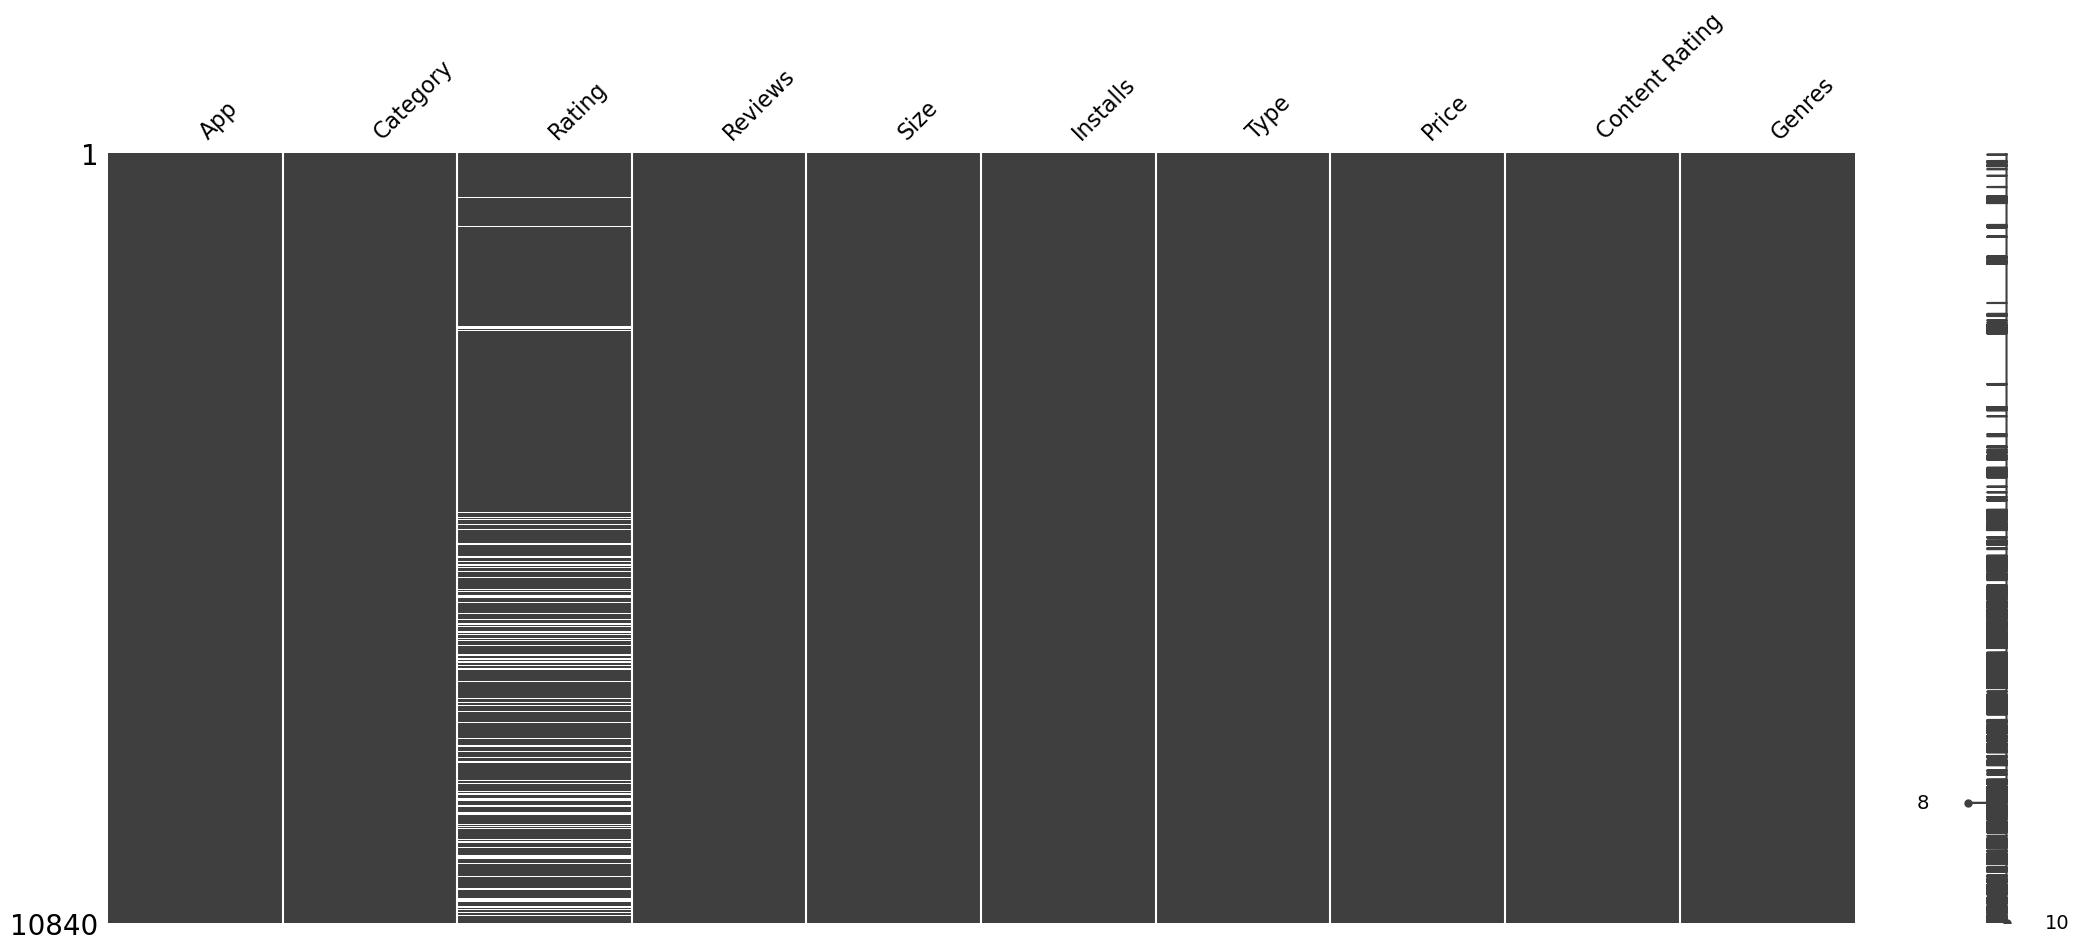

In [14]:
import missingno as msno
msno.matrix(df)

There are 1465 mising values in Rating column so it needs to be imputed. Rating' column: The missing values in the 'Rating' column are not random and may be related to unobserved factors affecting the app's rating. Therefore, it is likely to be MNAR.

# Handling Missing values

In [15]:
# Group by 'Category' and calculate the mean for 'Rating'
category_means = df.groupby('Category')['Rating'].mean()

# Impute missing values in 'Rating' based on the mean of the corresponding category
df['Rating'] = df.apply(lambda row: category_means[row['Category']] if pd.isnull(row['Rating']) else row['Rating'], axis=1)

As there is only one null value in Type column, we can drop that corresponding row

In [16]:
df=df.dropna(subset=['Type'])

In [17]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
dtype: int64

# Converting size into Numeric values

In [18]:
df.Size.value_counts().index

Index(['Varies with device', '11M', '12M', '14M', '13M', '15M', '17M', '19M',
       '26M', '16M',
       ...
       '412k', '459k', '478k', '782k', '721k', '430k', '429k', '200k', '460k',
       '619k'],
      dtype='object', length=461)

In [19]:
size=df['Size']

# Function to convert size strings to numeric values
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) 
    elif 'k' in size:
        return float(size.replace('k', ''))/1024
    elif 'Varies with device' in size:
        return np.nan
    else:
        return float(size)

# Apply the function to the 'Size' column
df['Size in MB'] = df['Size'].apply(convert_size)



C:\Users\am998\AppData\Local\Temp\ipykernel_20404\3098242227.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size in MB'] = df['Size'].apply(convert_size)


In [20]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Size                 0
Installs             0
Type                 0
Price                0
Content Rating       0
Genres               0
Size in MB        1694
dtype: int64

In [21]:
df.groupby('Type')['Size in MB'].mean()

Type
Free    21.706139
Paid    19.306538
Name: Size in MB, dtype: float64

In [22]:
# Group by 'Category' and calculate the mean for "Size in MB"
cat_mean = df.groupby('Category')['Size in MB'].mean()

# Impute missing values in 'Rating' based on the mean of the corresponding category
df['Size in MB'] = df.apply(lambda row: cat_mean[row['Category']] if pd.isnull(row['Size in MB']) else row['Size in MB'], axis=1)

df.drop(columns="Size",axis=1,inplace=True)

C:\Users\am998\AppData\Local\Temp\ipykernel_20404\3442041141.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Size in MB'] = df.apply(lambda row: cat_mean[row['Category']] if pd.isnull(row['Size in MB']) else row['Size in MB'], axis=1)
C:\Users\am998\AppData\Local\Temp\ipykernel_20404\3442041141.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="Size",axis=1,inplace=True)


We have imputed null values(corresponding to varies with devices) with the median of the Category size

In [23]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Size in MB        0
dtype: int64

Now, there are no null values and we have treated all the missing values

In [24]:
#Converting Price into numeric type
df['Price']=df['Price'].apply(lambda x: x.replace('$',"") if '$'in str(x) else x).apply(lambda x: float(x))

df=df.rename(columns={'Price':'Price_in_$'})

C:\Users\am998\AppData\Local\Temp\ipykernel_20404\1963091530.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['Price'].apply(lambda x: x.replace('$',"") if '$'in str(x) else x).apply(lambda x: float(x))


In [25]:
df

,App,Category,Rating,Reviews,Installs,Type,Price_in_$,Content Rating,Genres,Size in MB
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159,"10,000+",Free,0.0,Everyone,Art & Design,19.000000
1,Coloring book moana,ART_AND_DESIGN,3.900000,967,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,14.000000
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510,"5,000,000+",Free,0.0,Everyone,Art & Design,8.700000
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644,"50,000,000+",Free,0.0,Teen,Art & Design,25.000000
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,2.800000
...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.500000,38,"5,000+",Free,0.0,Everyone,Education,53.000000
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4,100+,Free,0.0,Everyone,Education,3.600000
10837,Parkinson Exercices FR,MEDICAL,4.189143,3,"1,000+",Free,0.0,Everyone,Medical,9.500000
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114,"1,000+",Free,0.0,Mature 17+,Books & Reference,13.310188


In [26]:
#We have renamed price column as price_in_$
#We have dropped Size column as we have created one more column with the name Size in MB


# Handling Outliers

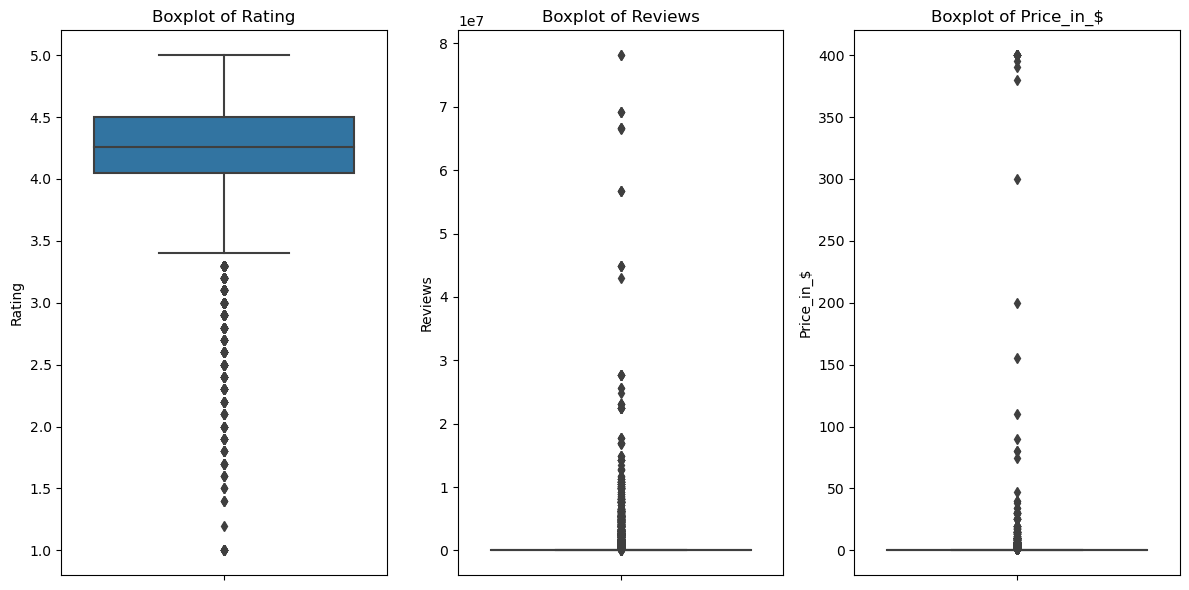

In [27]:
numerical_columns = ['Rating', 'Reviews','Price_in_$']


plt.figure(figsize=(12, 6))

# Create box plots for each numerical column
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot of {col}')

# Adjust layout
plt.tight_layout()
plt.show()

There are a lot of oulliers in the numerical columns, but they are significant in our analysis so its better to keep it. 

# Univariate Analysis

**Rating Column** 

c:\Users\am998\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

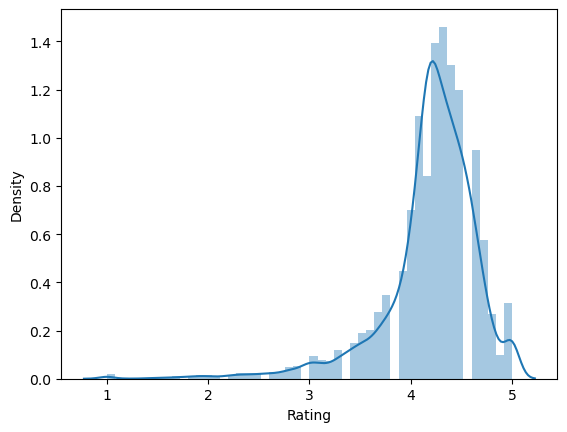

In [28]:
import seaborn as sns
sns.distplot(df['Rating'], kde=True)

In [29]:
df.Rating.skew() #checking for the skewness in Rating Column

-1.967274668757342

The rating column is left skewed, the majority of the data points cluster toward the right side, and the tail extends to the left, later on we need to transform it for better analysis

**Price Column**

c:\Users\am998\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


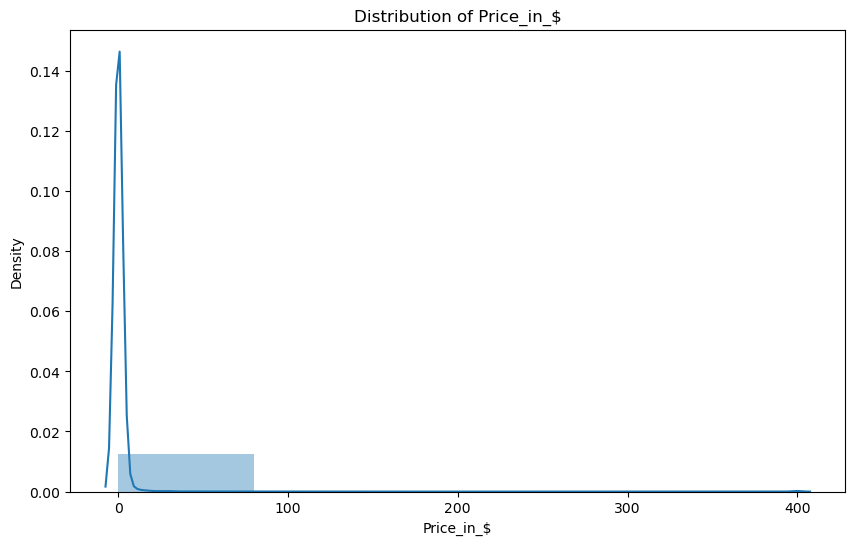

In [30]:
plt.figure(figsize=(10, 6))
sns.distplot(df['Price_in_$'],bins=5,kde=True)
plt.title('Distribution of Price_in_$')
plt.xlabel('Price_in_$')
plt.show()

In [31]:
df["Price_in_$"].skew()   

23.706294949834458

Here, the price data is highly right skewed and this need to be handled using transformation techniques

**Category Column**

In [32]:
top_categories=df['Category'].value_counts().nlargest(10)
fig = px.bar(
    top_categories,
    x=top_categories.index,
    y=top_categories.values,
    labels={'x': 'Category', 'y': 'Count'},
    title='Top 10 Categories by Count',
    
)
fig.show()

Family category has the highest count, indicating that it is the most prevalent category. The ‘Game’ and ‘Tools’ categories follow, suggesting these are also quite common. The ‘Finance’ category has the lowest count, implying it is less common compared to the other categories in this list.

**Content rating Column**

In [33]:
df['Content Rating'].value_counts()  #Checking for no. of unique values in each subcategory

Everyone           8714
Teen               1208
Mature 17+          499
Everyone 10+        413
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [34]:
content_rating_counts = df['Content Rating'].value_counts().reset_index()
content_rating_counts.columns = ['Content Rating', 'Count']

# Plotting the bar chart using Plotly Express
fig = px.bar(content_rating_counts, x='Content Rating', y='Count', 
             title='Distribution of Content Ratings',
             labels={'Content Rating': 'Content Rating', 'Count': 'Number of Apps'},
             color='Content Rating')

# Show the plot
fig.show()

The highest number of apps are rated “Everyone”, indicating that these apps are suitable for all age groups. The second highest category is “Teen”, suggesting a significant number of apps are designed with content appropriate for teenagers.

**Installs Column**

In [35]:
# Convert the 'Installs' column to a numerical format
df['Installs'] = df['Installs'].str.replace(',', '')  # Remove commas
df['Installs'] = df['Installs'].str.replace('+', '')  # Remove plus signs
df['Installs'] = pd.to_numeric(df['Installs'], errors='coerce')

# Define bins and labels
bins = [0, 1000, 10000, 100000, 1000000, 10000000, 100000000, float('inf')]
labels = ['0-1k', '1k-10k', '10k-100k', '100k-1M', '1M-10M', '10M-100M', '100M+']

# Create a new column 'Installs_Category' with the bin labels
df['Installs_Category'] = pd.cut(df['Installs'], bins=bins, labels=labels, right=False)

# Now you can analyze the distribution using the new 'Installs_Category' column

C:\Users\am998\AppData\Local\Temp\ipykernel_20404\2782589106.py:3: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



In [36]:
df['Installs_Category'].head(3)

0    10k-100k
1     100k-1M
2      1M-10M
Name: Installs_Category, dtype: category
Categories (7, object): ['0-1k' < '1k-10k' < '10k-100k' < '100k-1M' < '1M-10M' < '10M-100M' < '100M+']

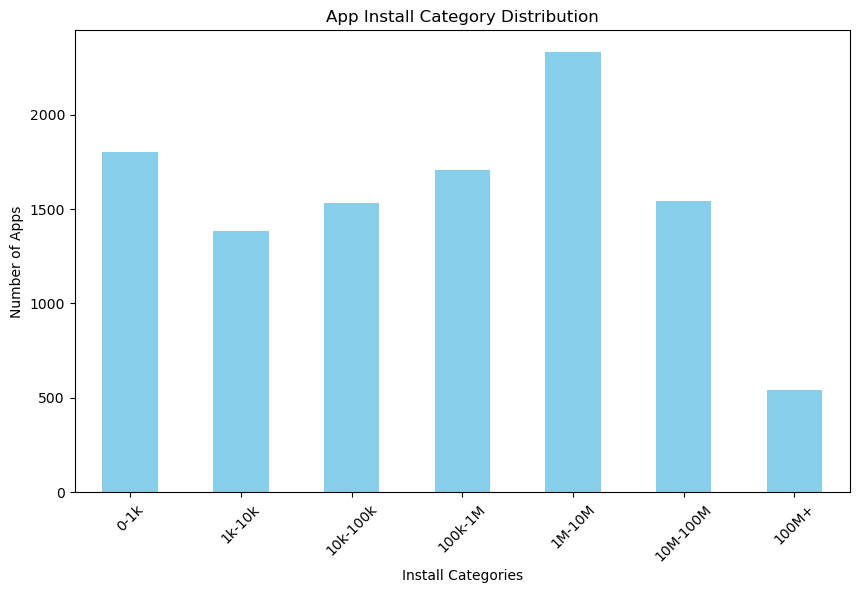

In [37]:
install_summary = df['Installs_Category'].value_counts().sort_index()
# Bar plot for distribution
plt.figure(figsize=(10, 6))
install_summary.plot(kind='bar', color='skyblue')
plt.title('App Install Category Distribution')
plt.xlabel('Install Categories')
plt.ylabel('Number of Apps')
plt.xticks(rotation=45)
plt.show()

the majority number of apps fall into the category of 0 - 10M installs, suggesting that majority of the apps have just a moderate install. There are only few apps which are having more than 100M+ downloads suggesting that only just fewer apps reach this high level of installs.

In [38]:
df=df.drop(columns="Installs",axis=1)

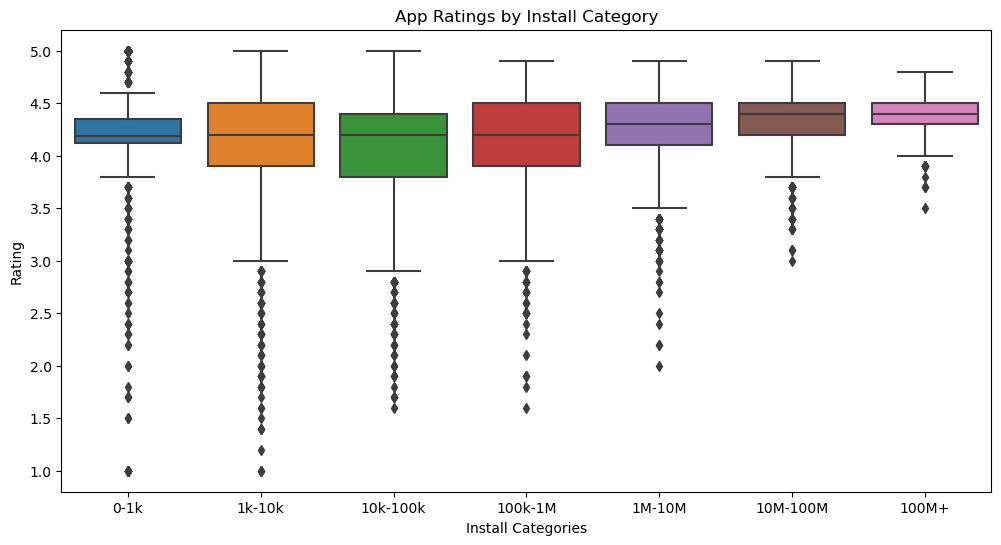

In [39]:
# Boxplot of Ratings by Install Categories
plt.figure(figsize=(12, 6))
sns.boxplot(x='Installs_Category', y='Rating', data=df, order=labels)
plt.title('App Ratings by Install Category')
plt.xlabel('Install Categories')
plt.ylabel('Rating')
plt.show()


Apps with most installs tend to have a higher ratings.
apps with lower number of downloads have more number of outliers being shown on ratings, they tend to get variety of ratings. but, as the download icreases the amount of outliers reduces meaning the ratings tend to be within some range

**Type Column**

In [40]:
df['Type'].value_counts()

Free    10039
Paid      800
Name: Type, dtype: int64

In [41]:
# Create a DataFrame with the value counts of 'Type'
type_counts = df['Type'].value_counts().reset_index()
type_counts.columns = ['Type', 'Count']

# Plotting the pie chart using Plotly Express
fig = px.pie(type_counts, values='Count', names='Type', 
             color_discrete_sequence=['#fcba03', 'light blue'],
             labels={'Type': 'App Type', 'Count': 'Number of Apps'},
             title='Percent of Free Vs Paid Apps in Store')

# Show the plot
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.show()

it suggests that number of apps allowed to be downloaded free are high, they may have high charges for in-app purchases. there are only some amount of apps that do charge money for downloading the apps.

**Genres Column**

In [40]:
df["Genres"].value_counts().head(5)

Tools            842
Entertainment    588
Education        527
Business         427
Medical          408
Name: Genres, dtype: int64

In [41]:
top5_genres = df['Genres'].value_counts().head(5).reset_index()
top5_genres.columns = ['Genres', 'Count']
fig = px.bar(top5_genres, x='Genres', y='Count',
             labels={'Genre': 'Genre', 'Count': 'Number of Apps'},
             title='Top 5 App Genres by Count',
             color='Count')

# Show the plot
fig.update_layout(xaxis_tickangle=-45, xaxis=dict(type='category'))
fig.show()

the 'Tools' genre has the highest count, indicating it is the most prevalent game. Enterntainment and Education follow indicating that they are also quite common

# Bivariate Analysis

In [42]:
# Bivariate analysis of 'Rating' vs 'Category'
fig = px.box(df, x='Category', y='Rating', title='Rating Distribution by Category')
fig.update_layout(xaxis_title='Category', yaxis_title='Rating')
fig.show()

In [43]:
# Bivariate analysis of 'Reviews' vs 'Rating'
fig = px.scatter(df, x='Reviews', y='Rating', title='Scatter Plot of Reviews vs Rating')
fig.update_layout(xaxis_title='Reviews', yaxis_title='Rating')
fig.show()


The majority of the ratings are between 4 and 5, indicating that most apps are well-received by users. The majority of the reviews are between 0 and 20M, suggesting that most apps do have a moderate number of reviews. There are some exceptions for some apps with good amount of reviews and ratings as we can see from the scatterplot.

# Multivariate Analysis

<AxesSubplot:>

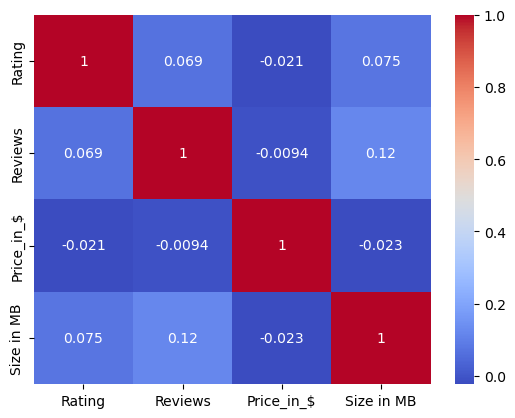

In [44]:
#Correlation heatmap
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

Among all the numeric column, rating and review columns are correlated most.

Among all the numeric column, rating and review columns are correlated most.

In [45]:
# Multivariate analysis - Pair plot
fig = px.scatter_matrix(df[['Rating', 'Reviews', 'Size in MB']], title='Pair Plot of Rating, Reviews, and Size')
fig.show()

Till getting 20M reviews, rating are fluctuated, after certain reviews, apps get popular and after that reviews increases with rating. 

# Reviews Distribution category wise

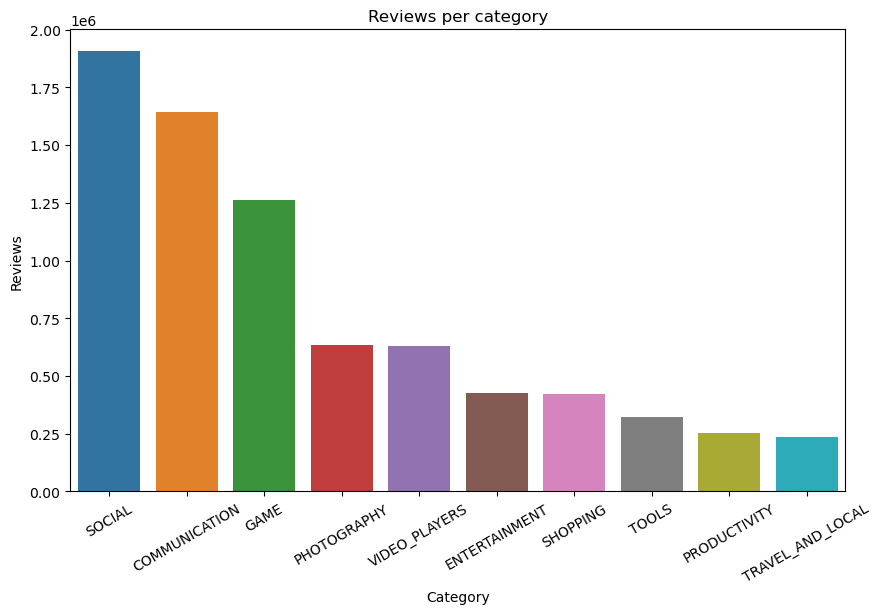

In [46]:
Reviews_per_categoory= pd.DataFrame(df.groupby("Category")["Reviews"].mean().nlargest(10).reset_index())
plt.figure(figsize=(10,6))
plt.xticks(rotation=30)
sns.barplot(data=Reviews_per_categoory, x='Category',y='Reviews')
plt.title('Reviews per category')
plt.show()

Social category has highest reviews among all apps It has 1.9M reviews.

# Top 3 Apps in terms of highest Reviews 

In [47]:
top_reviews = df.sort_values(by='Reviews', ascending=False).head(5)

# Plotting the bar chart using Plotly Express
fig = px.bar(top_reviews, x='App', y='Reviews',
             labels={'App': 'App', 'Reviews': 'Number of Reviews'},
             title='Highest Reviewed Apps',
             color='Reviews')

# Show the plot
fig.update_layout(xaxis_tickangle=-45, xaxis=dict(type='category'))
fig.show()

Facebook, WhatsApp Messenger and Instagram are most populated apps in terms of reviews. Let me remind that these apps are of social category, and we have already found that social category has highest reviews among all categoris.

In [42]:
df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Type', 'Price_in_$',
       'Content Rating', 'Genres', 'Size in MB', 'Installs_Category'],
      dtype='object')

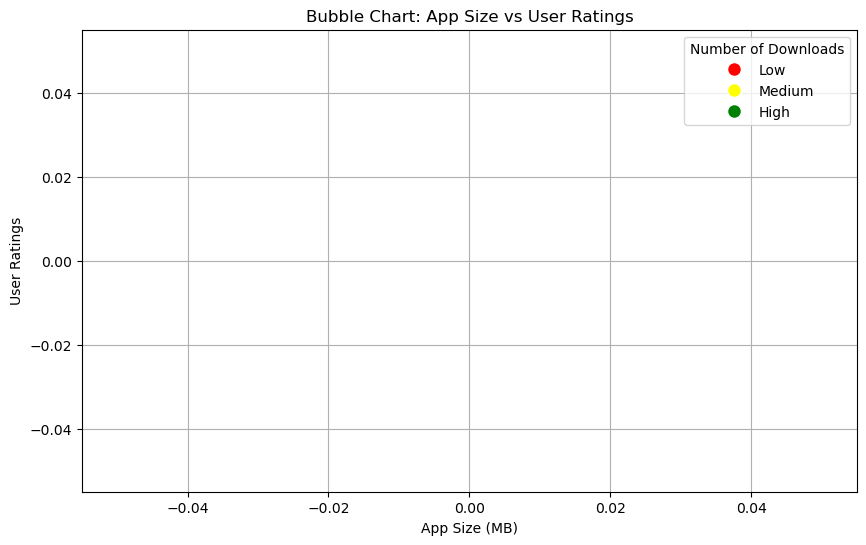

In [43]:

# Mapping categories to colors
color_mapping = {'Low': 'red', 'Medium': 'yellow', 'High': 'green'}
df['Color'] = df['Installs_Category'].map(color_mapping)

# Scatter plot with bubble size representing the number of downloads
plt.figure(figsize=(10, 6))
scatter = plt.scatter(df['Size in MB'], df['Rating'], s=100, c=df['Color'], alpha=0.7, edgecolors='black')

# Add labels and title
plt.title('Bubble Chart: App Size vs User Ratings')
plt.xlabel('App Size (MB)')
plt.ylabel('User Ratings')

# Create a legend
legend_labels = list(color_mapping.keys())
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_mapping[label], markersize=10) for label in legend_labels]
legend = plt.legend(legend_handles, legend_labels, title='Number of Downloads', loc='upper right')
plt.setp(legend.get_title(), fontsize=10)

# Show the plot
plt.grid(True)
plt.show()
plt.show()

In [49]:
import dash
from dash import dcc
from dash import html
import networkx as nx
from networkx.drawing.nx_pydot import graphviz_layout
import pygraphviz as pgv
from dash.dependencies import Input, Output


ValueError: Value of 'path_1' is not the name of a column in 'data_frame'. Expected one of ['App', 'Category', 'Rating', 'Reviews', 'Type', 'Price_in_$', 'Content Rating', 'Genres', 'Size in MB', 'Installs_Category', 'Color'] but received: Subcategory

# Top  paid apps based on reviews

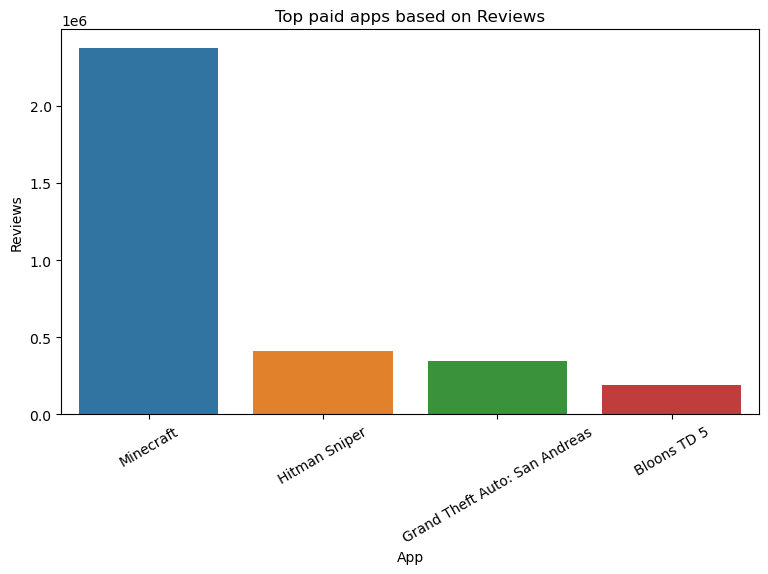

In [48]:
plt.figure(figsize=(9,5))
sns.barplot(x='App',y='Reviews', data=df[df['Type']=='Paid'].sort_values(by='Reviews', ascending=False).head(5))

plt.xticks(rotation=30)
plt.title('Top paid apps based on Reviews')
plt.show()

Minecraft, Hitman Sniper, Grand Theft Auto: San Andreas, Bloons TD 5 appps are highest paid apps based on reviews. 

# Top  free apps based on reviews

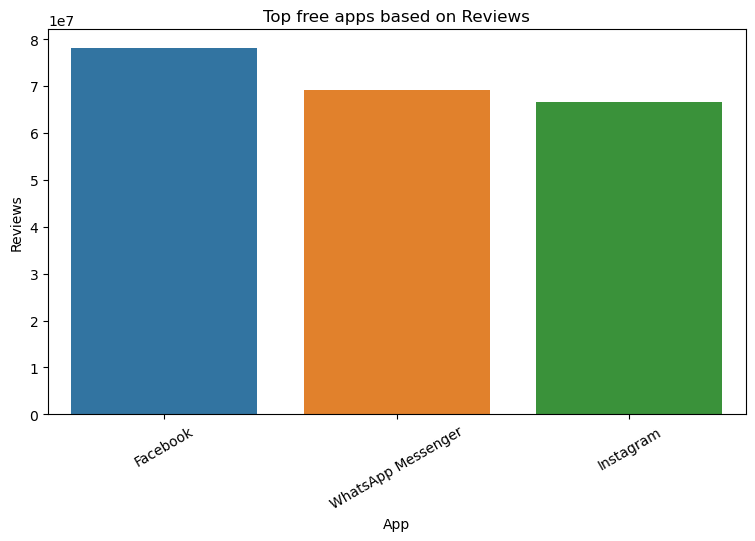

In [49]:
plt.figure(figsize=(9,5))
sns.barplot(x='App',y='Reviews', data=df[df['Type']=='Free'].sort_values(by='Reviews', ascending=False).head(5))

plt.xticks(rotation=30)
plt.title('Top free apps based on Reviews')
plt.show()

The apps which has highest reviews are also free apps based on reviews.

# Which category of the App has the highest Rating?

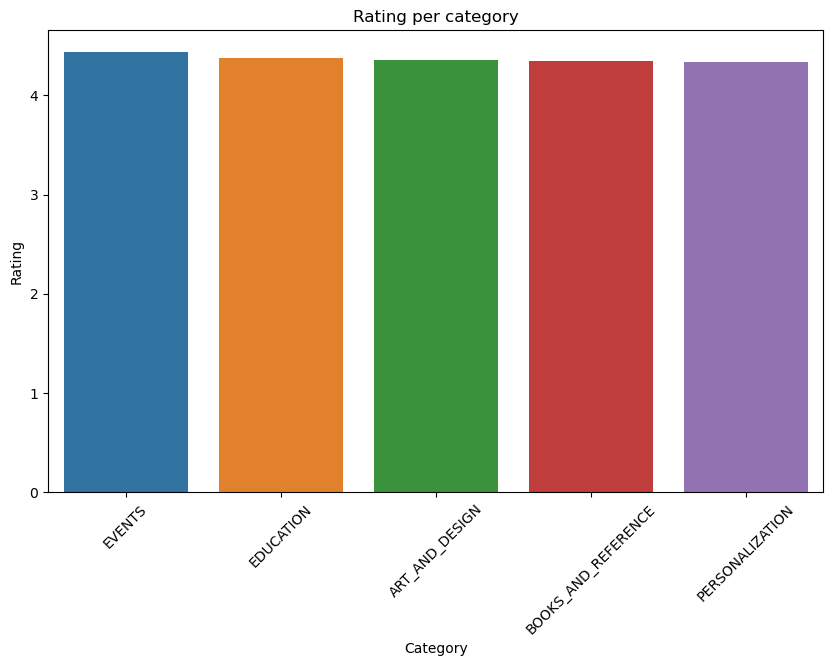

In [50]:
top_5_categories_rating= pd.DataFrame(df.groupby("Category")["Rating"].mean().nlargest(5).reset_index())
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(data=top_5_categories_rating,x='Category',y='Rating')
plt.title('Rating per category')
plt.show()

In [51]:
top_5_categories_rating

,Category,Rating
0,EVENTS,4.435556
1,EDUCATION,4.375969
2,ART_AND_DESIGN,4.358065
3,BOOKS_AND_REFERENCE,4.347458
4,PERSONALIZATION,4.333871


# Top 5 Apps in terms of highest Rating

In [52]:
top_rating = df.sort_values(by='Rating', ascending=False).head(5)

# Plotting the bar chart using Plotly Express
fig = px.bar(top_rating, x='App', y='Rating',
             labels={'App': 'App', 'Rating': 'Rating'},
             title='Highest Rated Apps',
             )

# Show the plot
fig.update_layout(xaxis_tickangle=-45, xaxis=dict(type='category'))
fig.show()

In [53]:
top_rating 

,App,Category,Rating,Reviews,Type,Price_in_$,Content Rating,Genres,Size in MB,Installs_Category
9089,DYPSOET,FAMILY,5.0,8,Free,0.0,Everyone,Education,7.400000,0-1k
9496,Master E.K,FAMILY,5.0,90,Free,0.0,Everyone,Education,27.930205,1k-10k
10416,FH School,FAMILY,5.0,4,Free,0.0,Everyone,Education,5.800000,0-1k
329,Hojiboy Tojiboyev Life Hacks,COMICS,5.0,15,Free,0.0,Everyone,Comics,37.000000,1k-10k
2533,Zen Leaf,MEDICAL,5.0,1,Free,0.0,Mature 17+,Medical,6.100000,0-1k


This bar graph has given name of the apps with highest rating from the customers. Highest rated apps are DYPSOET, Master E.K,FH School, Hojiboy Tojiboyev Life Hacks, Zen Leaf which are mostly of the Family Category. 

# Top 5 paid apps based on rating

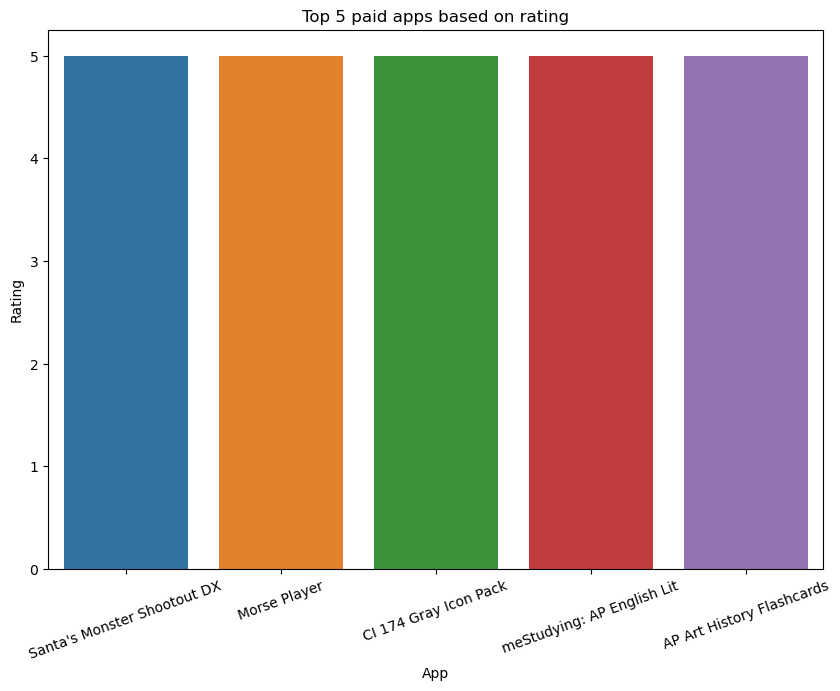

In [54]:
plt.figure(figsize=(10,7))
sns.barplot(x='App',y='Rating', data=df[df['Type']=='Paid'].sort_values(by='Rating', ascending=False).head(5))

plt.xticks(rotation=20)
plt.title('Top 5 paid apps based on rating')
plt.show()

In [55]:
df[df['Type']=='Paid'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Type,Price_in_$,Content Rating,Genres,Size in MB,Installs_Category
9056,Santa's Monster Shootout DX,GAME,5.0,4,Paid,1.99,Teen,Action,33.000000,0-1k
8014,Morse Player,FAMILY,5.0,12,Paid,1.99,Everyone,Education,2.400000,0-1k
7377,CI 174 Gray Icon Pack,PERSONALIZATION,5.0,1,Paid,0.99,Everyone,Personalization,46.000000,0-1k
5482,meStudying: AP English Lit,FAMILY,5.0,1,Paid,4.99,Everyone,Education,0.639648,0-1k
5489,AP Art History Flashcards,FAMILY,5.0,1,Paid,29.99,Mature 17+,Education,96.000000,0-1k


Santa's Monster Shootout DX, Morse Player,CI 174 Gray Icon Pack, meStudying: AP English Lit, AP Art History Flashcards apps are high rated paid apps. You can also see their categories above.  

# Top 5 free apps based on rating


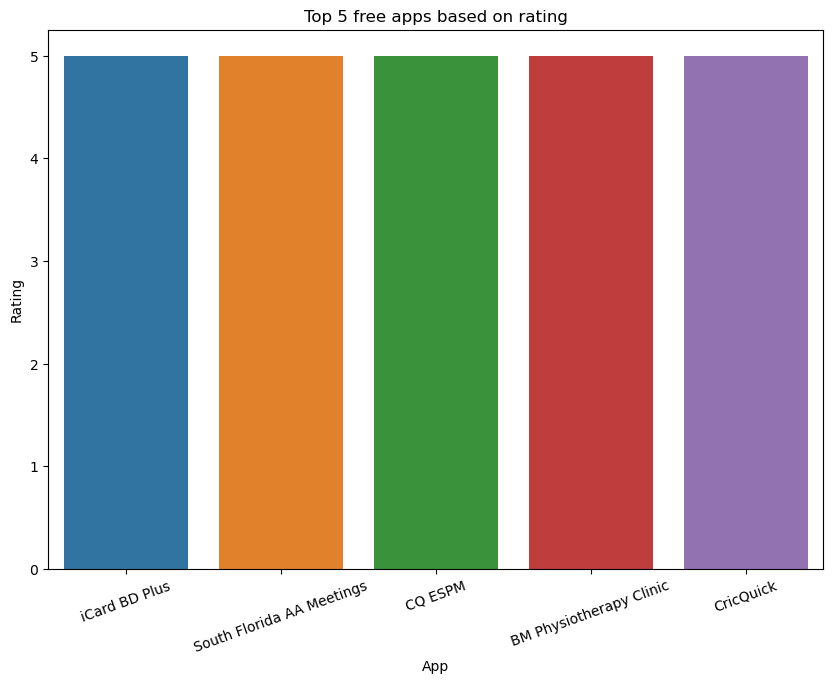

In [56]:
plt.figure(figsize=(10,7))
sns.barplot(x='App',y='Rating', data=df[df['Type']=='Free'].sort_values(by='Rating', ascending=False).head(5))

plt.xticks(rotation=20)
plt.title('Top 5 free apps based on rating')
plt.show()

In [57]:
df[df['Type']=='Free'].sort_values(by='Rating', ascending=False).head(5)

,App,Category,Rating,Reviews,Type,Price_in_$,Content Rating,Genres,Size in MB,Installs_Category
6030,iCard BD Plus,SOCIAL,5.0,2,Free,0.0,Everyone,Social,2.4,0-1k
10601,South Florida AA Meetings,LIFESTYLE,5.0,10,Free,0.0,Everyone,Lifestyle,21.0,1k-10k
7731,CQ ESPM,BUSINESS,5.0,2,Free,0.0,Everyone,Business,3.4,0-1k
6484,BM Physiotherapy Clinic,HEALTH_AND_FITNESS,5.0,3,Free,0.0,Everyone,Health & Fitness,9.3,0-1k
7754,CricQuick,SPORTS,5.0,17,Free,0.0,Everyone,Sports,1.5,0-1k


iCard BD Plus, South Florida AA Meetings, CQ ESPM, BM Physiotherapy Clinic, CricQuick apps are high rated free apps. 

# Prices per category

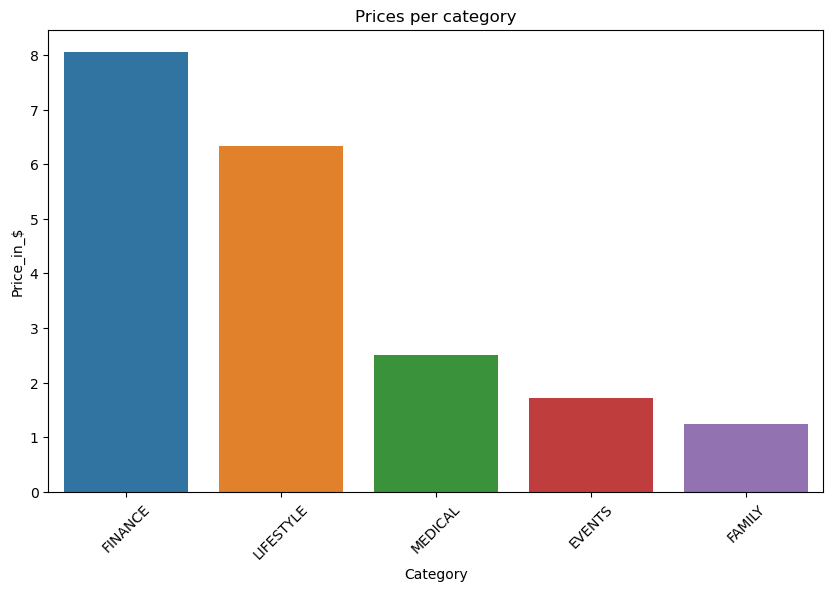

In [58]:
top_5_categories_Price= pd.DataFrame(df.groupby("Category")["Price_in_$"].mean().nlargest(5).reset_index())
plt.figure(figsize=(10,6))
plt.xticks(rotation=45)
sns.barplot(data=top_5_categories_Price,x='Category',y='Price_in_$')
plt.title('Prices per category')
plt.show()

This bar graph has given us the average amount that needs to be paid per each category. This shows us that 'Finance' category has the highest average price per apps related to financing.

# Top 5 expensive apps on play store

In [59]:
# Sorting the DataFrame by 'Price' to get the top 5 most expensive apps
top5_expensive = df.sort_values(by='Price_in_$', ascending=False).head(5)

# Plotting the bar chart using Plotly Express
fig = px.bar(top5_expensive, x='App', y='Price_in_$',
             labels={'App': 'App', 'Price_in_$': 'Price'},
             title='Top 5 Most Expensive Apps on the Play Store',
             color='Price_in_$')

# Show the plot
fig.update_layout(xaxis_tickangle=-45, xaxis=dict(type='category'))
fig.show()

In [60]:
top5_expensive # Printing top 5 values

,App,Category,Rating,Reviews,Type,Price_in_$,Content Rating,Genres,Size in MB,Installs_Category
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,Paid,400.00,Everyone,Lifestyle,7.3,10k-100k
5356,I Am Rich Premium,FINANCE,4.1,1867,Paid,399.99,Everyone,Finance,4.7,10k-100k
5351,I am rich,LIFESTYLE,3.8,3547,Paid,399.99,Everyone,Lifestyle,1.8,100k-1M
5358,I am Rich!,FINANCE,3.8,93,Paid,399.99,Everyone,Finance,22.0,1k-10k
5362,I Am Rich Pro,FAMILY,4.4,201,Paid,399.99,Everyone,Entertainment,2.7,1k-10k


This gives us the apps with highest price in dollars. " i'm  Rich - Trump Edition " has the highest price among all the apps in the dataset. 

# Top 5 Genre highly rated apps with size¶

In [61]:
top_genre_app=df.groupby("Genres")["Rating","Size in MB"].mean().reset_index()
top_genre_apps = top_genre_app.sort_values(by='Rating', ascending=False).reset_index(drop=True)
top_genre_apps.head(5)


C:\Users\am998\AppData\Local\Temp\ipykernel_17508\1332837821.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Genres,Rating,Size in MB
0,Comics;Creativity,4.8,12.0
1,Board;Pretend Play,4.8,42.0
2,Health & Fitness;Education,4.7,55.0
3,Puzzle;Education,4.6,22.0
4,Adventure;Brain Games,4.6,8.1


# Does price increases as Rating increases?

<AxesSubplot:xlabel='Rating', ylabel='Price_in_$'>

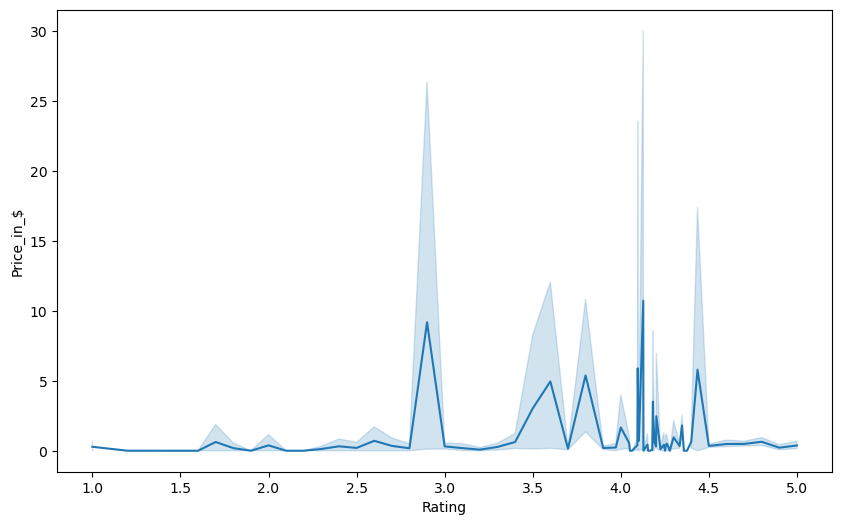

In [62]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, y=df['Price_in_$'], x = df['Rating'])

Though relationship of price and reviews is not linear. At some point price is incraesing as rating increases.

# Does reviews increases linearly as rating incresaes?

<AxesSubplot:xlabel='Rating', ylabel='Reviews'>

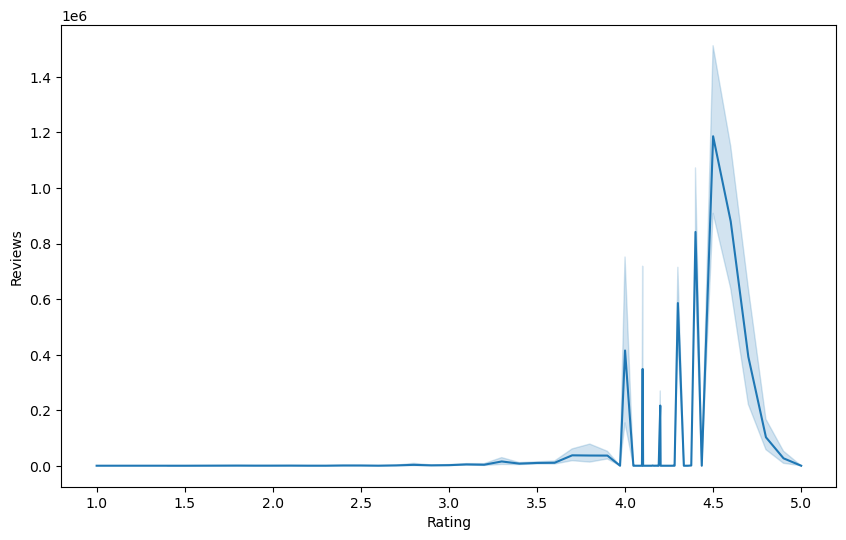

In [63]:
plt.figure(figsize=(10,6))
sns.lineplot(data=df, y=df['Reviews'], x = df['Rating'])


The review increases as the rating is high, which indicates that customers with the great satisfaction with the app have given more reviews compard to thew people with the less satisfaction with the apps. 

# Number of 5 Rated Apps in each category

In [64]:
max_rating=df[df['Rating']==5]     
print(max_rating.shape)   
print(f"Number of Apps with rating 5 in each category") 
max_rating['Category'].value_counts().nlargest(5) #Categories of apps which have rating 5

(271, 10)
Number of Apps with rating 5 in each category


FAMILY       67
LIFESTYLE    29
MEDICAL      25
BUSINESS     18
TOOLS        17
Name: Category, dtype: int64

Family category has highest number of 5 rated apps.

In [65]:
subcategory_df = max_rating[max_rating['Category'] == 'FAMILY']
top_5_family_apps = subcategory_df[['App', 'Rating']].nlargest(5, 'Rating')
print(top_5_family_apps)

                             App  Rating
5246       Hey AJ! It's Bedtime!     5.0
5268     AJ Rafael Music Lessons     5.0
5450                   AP® Guide     5.0
5482  meStudying: AP English Lit     5.0
5489   AP Art History Flashcards     5.0


you can see most of the 5 rated apps are in family category.

Hey AJ! It's Bedtime!, AJ Rafael Music Lessons, AP® Guide, meStudying: AP English Lit, AP Art History Flashcards are apps in family category.

# Is there a relation between the size of an app and its popularity or user ratings

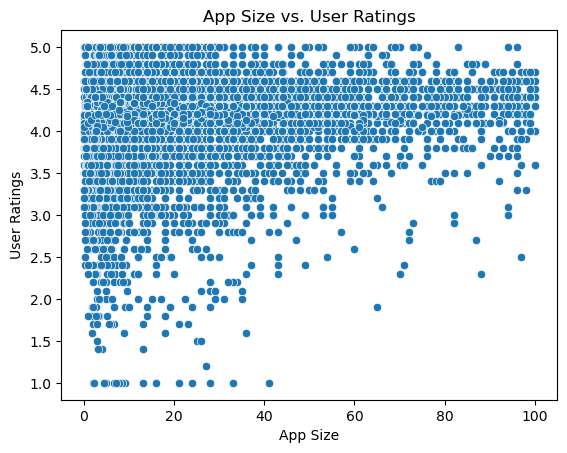

In [66]:
sns.scatterplot(x='Size in MB', y='Rating', data=df)
plt.title('App Size vs. User Ratings')
plt.xlabel('App Size')
plt.ylabel('User Ratings')
plt.show()

Apps with low amount of app size between 0-60 mb has more number of ratings than bigger size apps. the range of rating for low sized apps has much variations, it ranges from about 1 to 5. but, for apps with bigger size they have very low variation in the ratings being given. This shows apps with bigger size has good positive reviews than the apps with the lower size.

In [67]:
df.dtypes

App                    object
Category               object
Rating                float64
Reviews                 int64
Type                   object
Price_in_$            float64
Content Rating         object
Genres                 object
Size in MB            float64
Installs_Category    category
dtype: object

# Is there a relationship between the pricing and user reviews?

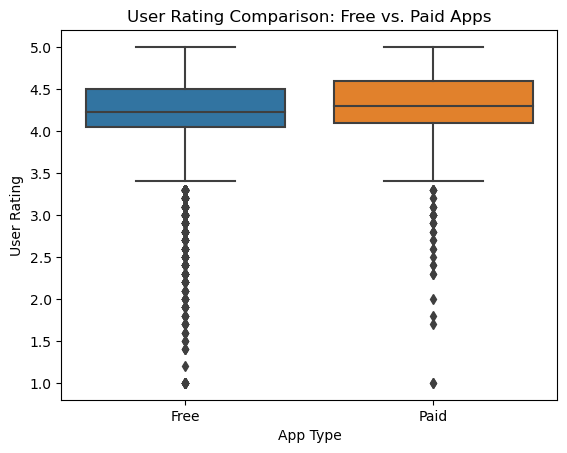

In [68]:
# Boxplot to compare user ratings between free and paid apps
sns.boxplot(x='Type', y='Rating', data=df)
plt.title('User Rating Comparison: Free vs. Paid Apps')
plt.xlabel('App Type')
plt.ylabel('User Rating')
plt.show()

This shows us that free apps has less average ratings than the paid apps. both shows outliers, but it shows that free apps does have more extreme outliers than paid apps.

# Feature Engineering

QQ Plot for numerical columns
Make the columns normally distri
use standarr scaling
split the data

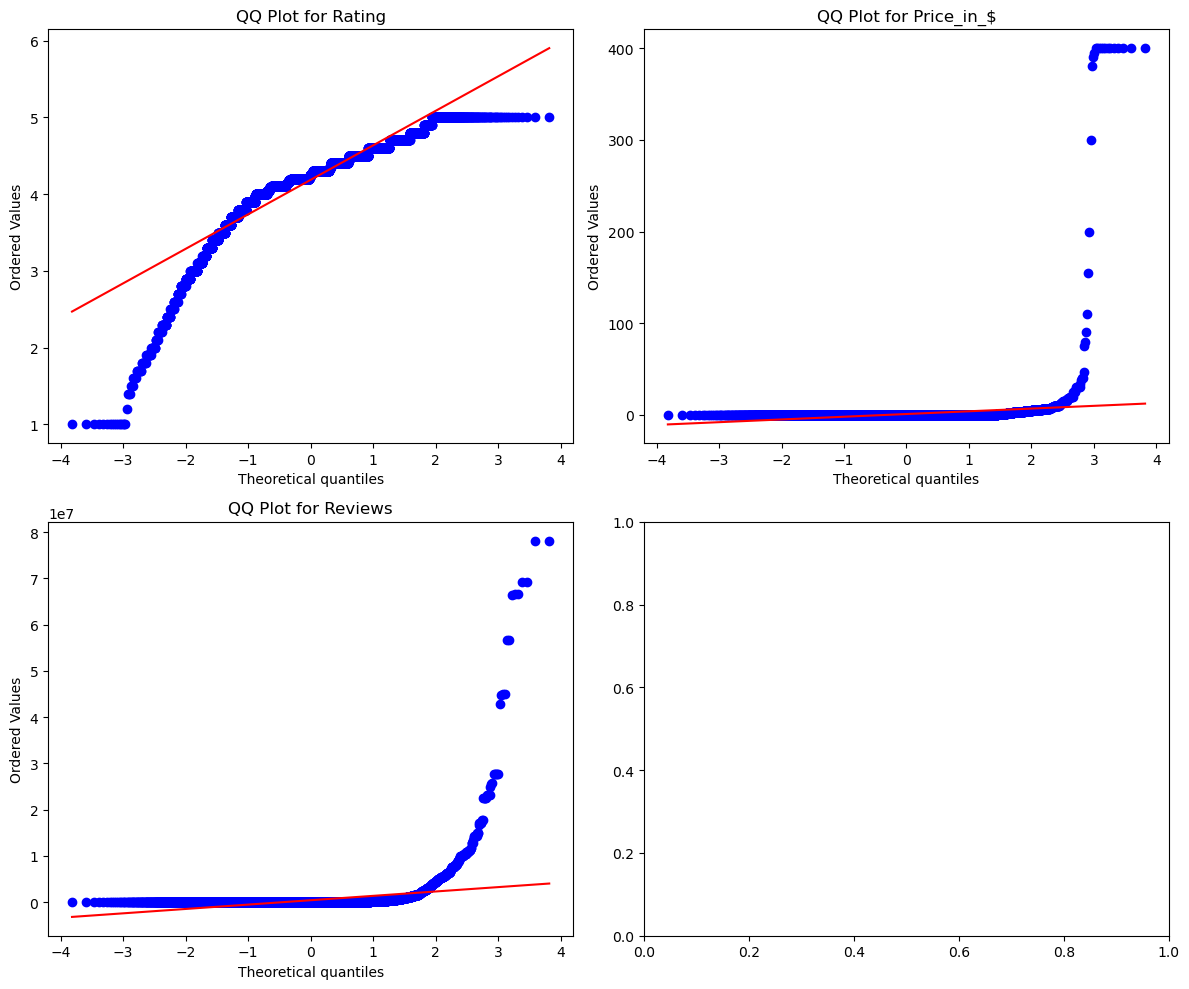

In [69]:
# Columns for QQ plots
numerical_columns = ['Rating', 'Price_in_$', 'Reviews']

# Create subplots for QQ plots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 10))

# Flatten the 2D array of subplots
axes = axes.flatten()

# Plot QQ plots for each numerical column
for i, column in enumerate(numerical_columns):
    ax = axes[i]
    stats.probplot(df[column], dist="norm", plot=ax)
    ax.set_title(f'QQ Plot for {column}')

# Adjust layout
plt.tight_layout()
plt.show()

From the QQ plot, it is quite evident that columns 'Reviews' and Price_in_$ are right skewed and column'Rating is left skewed. Hence these needs to transformed to make it normal

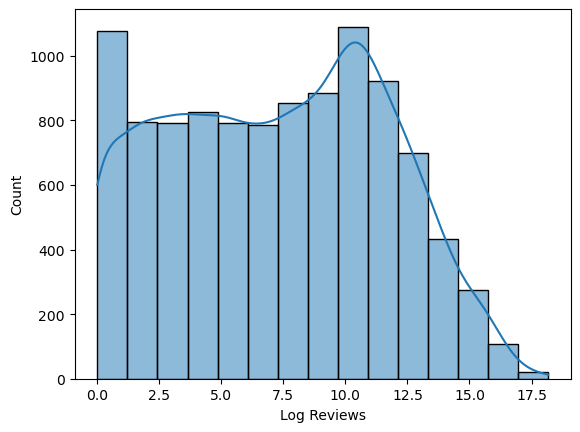

In [70]:
# Apply and plot Log Transformation for Review Column
df['Reviews'] = np.log1p(df['Reviews'])  # Using log1p to handle zero values gracefully
sns.histplot(df['Reviews'], bins=15, kde=True)
plt.xlabel("Log Reviews")
plt.show()

In [71]:
df['Reviews'].skew()  #The value is nearly equal to zero hence it is normalized 

0.022002473933963845

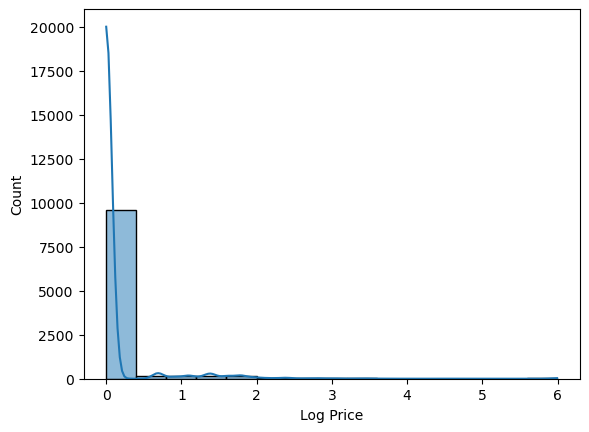

In [72]:
# Apply and plot Log Transformation for Price Column
df['Price_in_$'] = np.log1p(df['Price_in_$'])  # Using log1p to handle zero values gracefully
sns.histplot(df['Price_in_$'], bins=15, kde=True)
plt.xlabel("Log Price")
plt.show()

In [73]:
df['Price_in_$'].skew()

5.998052162074721

In [74]:
df.isnull().sum()

App                  0
Category             0
Rating               0
Reviews              0
Type                 0
Price_in_$           0
Content Rating       0
Genres               0
Size in MB           0
Installs_Category    0
dtype: int64

# Splitting

In [75]:

from sklearn.model_selection import train_test_split

y = df['Rating']
X=df.loc[:,~df.columns.isin(['Rating'])]

# Split the data into training and testing sets
# Adjust the test_size parameter to control the proportion of the test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train

,App,Category,Reviews,Type,Price_in_$,Content Rating,Genres,Size in MB,Installs_Category
1948,Zombie Hunter King,GAME,9.262838,Free,0.000000,Mature 17+,Action,50.000000,1M-10M
1201,"Delivery Club-food delivery: pizza, sushi, bur...",FOOD_AND_DRINK,11.925571,Free,0.000000,Everyone,Food & Drink,22.056122,1M-10M
4700,Mike V: Skateboard Party PRO,SPORTS,7.826842,Paid,1.607436,Everyone,Sports,24.180992,10k-100k
9157,POGO Games,FAMILY,10.392098,Free,0.000000,Everyone,Casual,26.000000,1M-10M
3632,MyRadar NOAA Weather Radar,WEATHER,12.094778,Free,0.000000,Everyone,Weather,13.124006,10M-100M
...,...,...,...,...,...,...,...,...,...
6193,Cut Out : Background Eraser and background cha...,PHOTOGRAPHY,8.870523,Free,0.000000,Everyone,Photography,9.200000,1M-10M
5648,Five Nights at Freddy's 3,GAME,10.234840,Paid,1.383791,Teen,Action,50.000000,100k-1M
5847,Lunar Calendar,LIFESTYLE,6.184149,Paid,1.790091,Mature 17+,Lifestyle,14.856415,1k-10k
1008,"StubHub - Tickets to Sports, Concerts & Events",EVENTS,10.169307,Free,0.000000,Everyone,Events,13.963617,1M-10M


Rating column has transformed and now skewness has changed to 0.018 which is quite good. 

In [76]:
X_train.isnull().sum()

App                  0
Category             0
Reviews              0
Type                 0
Price_in_$           0
Content Rating       0
Genres               0
Size in MB           0
Installs_Category    0
dtype: int64

In [77]:
X_test.isnull().sum()

App                  0
Category             0
Reviews              0
Type                 0
Price_in_$           0
Content Rating       0
Genres               0
Size in MB           0
Installs_Category    0
dtype: int64

# Encoding

In [78]:
X_test.isnull().sum()

App                  0
Category             0
Reviews              0
Type                 0
Price_in_$           0
Content Rating       0
Genres               0
Size in MB           0
Installs_Category    0
dtype: int64

# Scaling

In [79]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train['Reviews']= scaler.fit_transform(X_train['Reviews'].values.reshape(-1,1))

# Transform the test set using the same scaler
X_test['Reviews']= scaler.transform(X_test['Reviews'].values.reshape(-1,1))


In [80]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# Fit and transform the training set
X_train['Price_in_$']= scaler.fit_transform(X_train['Price_in_$'].values.reshape(-1,1))

# Transform the test set using the same scaler
X_test['Price_in_$']= scaler.transform(X_test['Price_in_$'].values.reshape(-1,1))

In [81]:
from sklearn.preprocessing import OneHotEncoder
# Columns to encode
categorical_columns = ["Type", "Content Rating"]



# Initialize OneHotEncoder
encoder = OneHotEncoder(sparse=False, drop="first")

# Fit and transform on training set
X_train_encoded = encoder.fit_transform(X_train[categorical_columns])
X_train_encoded_df = pd.DataFrame(X_train_encoded, columns=encoder.get_feature_names_out(categorical_columns))
X_train_encoded_df.index = X_train.index  # Ensure the index matches for concatenation
X_train.drop(columns=categorical_columns, inplace=True)
X_train = pd.concat([X_train, X_train_encoded_df], axis=1)





In [82]:
X_train

,App,Category,Reviews,Price_in_$,Genres,Size in MB,Installs_Category,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
1948,Zombie Hunter King,GAME,0.464790,-0.241601,Action,50.000000,1M-10M,0.0,0.0,0.0,1.0,0.0,0.0
1201,"Delivery Club-food delivery: pizza, sushi, bur...",FOOD_AND_DRINK,1.075053,-0.241601,Food & Drink,22.056122,1M-10M,0.0,1.0,0.0,0.0,0.0,0.0
4700,Mike V: Skateboard Party PRO,SPORTS,0.135680,3.040910,Sports,24.180992,10k-100k,1.0,1.0,0.0,0.0,0.0,0.0
9157,POGO Games,FAMILY,0.723601,-0.241601,Casual,26.000000,1M-10M,0.0,1.0,0.0,0.0,0.0,0.0
3632,MyRadar NOAA Weather Radar,WEATHER,1.113832,-0.241601,Weather,13.124006,10M-100M,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6193,Cut Out : Background Eraser and background cha...,PHOTOGRAPHY,0.374877,-0.241601,Photography,9.200000,1M-10M,0.0,1.0,0.0,0.0,0.0,0.0
5648,Five Nights at Freddy's 3,GAME,0.687560,2.584210,Action,50.000000,100k-1M,1.0,0.0,0.0,0.0,1.0,0.0
5847,Lunar Calendar,LIFESTYLE,-0.240803,3.413907,Lifestyle,14.856415,1k-10k,1.0,0.0,0.0,1.0,0.0,0.0
1008,"StubHub - Tickets to Sports, Concerts & Events",EVENTS,0.672541,-0.241601,Events,13.963617,1M-10M,0.0,1.0,0.0,0.0,0.0,0.0


In [83]:
from sklearn.preprocessing import OneHotEncoder

# Assuming encoder is already fitted on X_train for columns ["Type", "Content Rating"]

# Transform test data using the same encoder
X_test_encoded = encoder.transform(X_test[["Type", "Content Rating"]])

# Create a DataFrame with the encoded columns
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(["Type", "Content Rating"]))

# Drop the original columns from the test DataFrame
X_test.drop(columns=["Type", "Content Rating"], inplace=True)

# Concatenate the original test DataFrame with the encoded DataFrame
X_test = pd.concat([X_test, X_test_encoded_df], axis=1)


Standardised the Reviews and Price_in_$ column

X_test.isnull().sum()

In [84]:
from sklearn.preprocessing import OneHotEncoder
X_test_encoded = encoder.transform(X_test[["Type", "Content Rating"]])
X_test_encoded_df = pd.DataFrame(X_test_encoded, columns=encoder.get_feature_names_out(["Type", "Content Rating"]))
# Drop the original columns from the test DataFrame
X_test.drop(columns=["Type", "Content Rating"], inplace=True)


X_test = pd.concat([X_test, X_test_encoded_df], axis=1)




KeyError: "None of [Index(['Type', 'Content Rating'], dtype='object')] are in the [columns]"

In [86]:
X_train

,App,Category,Reviews,Price_in_$,Genres,Size in MB,Installs_Category,Type_Paid,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen,Content Rating_Unrated
1948,Zombie Hunter King,GAME,0.464790,-0.241601,Action,50.000000,1M-10M,0.0,0.0,0.0,1.0,0.0,0.0
1201,"Delivery Club-food delivery: pizza, sushi, bur...",FOOD_AND_DRINK,1.075053,-0.241601,Food & Drink,22.056122,1M-10M,0.0,1.0,0.0,0.0,0.0,0.0
4700,Mike V: Skateboard Party PRO,SPORTS,0.135680,3.040910,Sports,24.180992,10k-100k,1.0,1.0,0.0,0.0,0.0,0.0
9157,POGO Games,FAMILY,0.723601,-0.241601,Casual,26.000000,1M-10M,0.0,1.0,0.0,0.0,0.0,0.0
3632,MyRadar NOAA Weather Radar,WEATHER,1.113832,-0.241601,Weather,13.124006,10M-100M,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6193,Cut Out : Background Eraser and background cha...,PHOTOGRAPHY,0.374877,-0.241601,Photography,9.200000,1M-10M,0.0,1.0,0.0,0.0,0.0,0.0
5648,Five Nights at Freddy's 3,GAME,0.687560,2.584210,Action,50.000000,100k-1M,1.0,0.0,0.0,0.0,1.0,0.0
5847,Lunar Calendar,LIFESTYLE,-0.240803,3.413907,Lifestyle,14.856415,1k-10k,1.0,0.0,0.0,1.0,0.0,0.0
1008,"StubHub - Tickets to Sports, Concerts & Events",EVENTS,0.672541,-0.241601,Events,13.963617,1M-10M,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
df.to_csv("Updated_df.csv",index=False)

In [ ]:
X_train.to_csv('Train_data.csv',index=False)
X_test.to_csv('Test_data.csv',index=False)